In [2]:
import cv2
import numpy as np
from math import atan2, cos, sin, sqrt, pi
import matplotlib.pyplot as plt
import os

In [3]:
def draw_axis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv2.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv2.LINE_AA)

def get_orientation(pts, img):
    
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)
    # Store the center of the object
    # cntr = (50, 50)
    # cntr = (int(mean[0,0]), int(mean[0,1]))
    cntr = (0, 0)
    
    # cv2.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 1 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 1 * eigenvectors[0,1] * eigenvalues[0,0])
    # p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    draw_axis(img, cntr, p1, (0, 150, 0), 1)
    # draw_axis(img, cntr, p2, (200, 150, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians

    angle = angle * 180 / pi
    # print("Angle :", angle)
    return p1, cntr, angle

# PATH = "./KIMIA dataset/tool38.png"
def getVector(img2):
    img = img2.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, bw = cv2.threshold(gray.astype("uint8"), 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # plt.imshow(img, cmap='binary')

    contours, _ = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # cv2.drawContours(img, contours, 0, (0, 0, 255), 1)
    p1, cntr, angle = get_orientation(contours[0], img)
    # print("img")
    # plt.imshow(img)
    # plt.show()
    # print("img2")
    # plt.imshow(img2)
    # plt.show()
    return p1, cntr, angle, img

def calculate_theta(x, y):
    costheta = np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))
    # print(costheta)
    # in degrees
    theta = np.rad2deg(np.arccos(costheta)) 
    # print(theta)
    return theta

In [6]:
def getAllRotation(TEMPLATE_PATH, DIR_PATH):
    print("Template: ", TEMPLATE_PATH)
    template = plt.imread(TEMPLATE_PATH)
    template = np.repeat(template[:,:,np.newaxis], 3, axis=2)
    template = cv2.resize(template, (100,100))
    x, center_t, angle_template, vector_template = getVector(template)

    list = os.listdir(DIR_PATH)
    list.sort()

    for name in list:
        if(name == 'tool22.png' or name == "output"):
            continue
        print(DIR_PATH+name)
        img = plt.imread(DIR_PATH+name)
        img = np.repeat(img[:,:,np.newaxis], 3, axis=2)
        img = cv2.resize(img, (100,100))
        y, center_i, angle_img, vector_img = getVector(img)

        plt.imshow(vector_img)
        plt.show()

        print(center_i)
        theta = np.sign(np.cross(y, x)) * calculate_theta(x, y)
        print(theta)

        # theta = angle_img - angle_template

        print(theta)
        
        RM = cv2.getRotationMatrix2D((50, 50), -theta, 1.0)
        rotated = cv2.warpAffine(img, RM, (125, 125))
        rotated_vector = cv2.warpAffine(vector_img, RM, (125, 125))

        # for saving the rotated image
        # plt.imsave(DIR_PATH+'output/'+name, rotated)

        # plt.subplot(1,2,1)
        # plt.imshow(img)
        # plt.subplot(1,2,2)
        # plt.imshow(rotated)
        # plt.show() 

        # draw a 2 * 2 plot
        plt.subplot(2,2,1)
        plt.imshow(template)
        plt.subplot(2,2,2)
        plt.imshow(vector_img)
        plt.subplot(2,2,3)
        plt.imshow(vector_template)
        plt.subplot(2,2,4)
        plt.imshow(rotated_vector)
        plt.show()

        # plt.imshow(rotated_vector)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Template:  ./KIMIA dataset/tool22.png
./KIMIA dataset/bonefishes.png


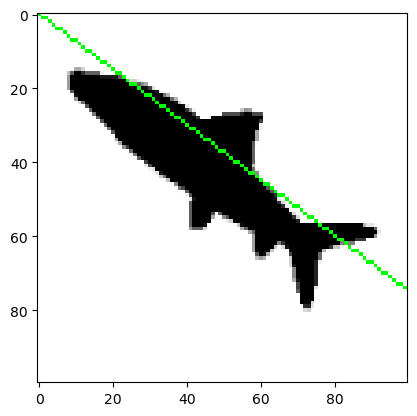

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-158.23721357020645
-158.23721357020645


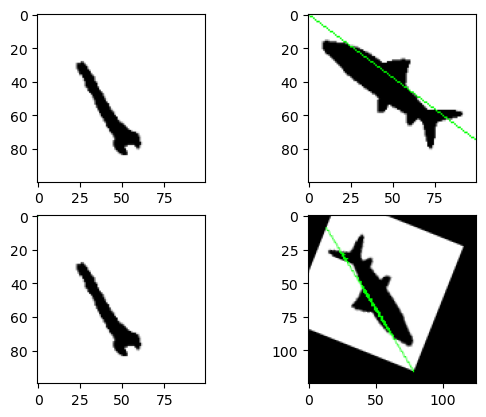

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/bonefishesocc1.png


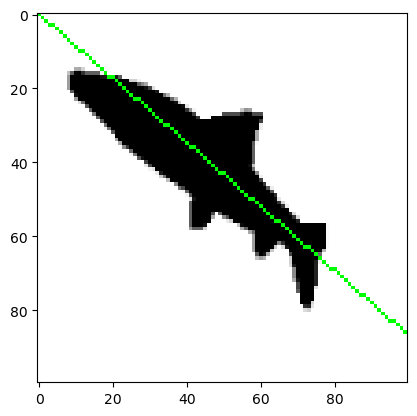

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-162.72123731034387
-162.72123731034387


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


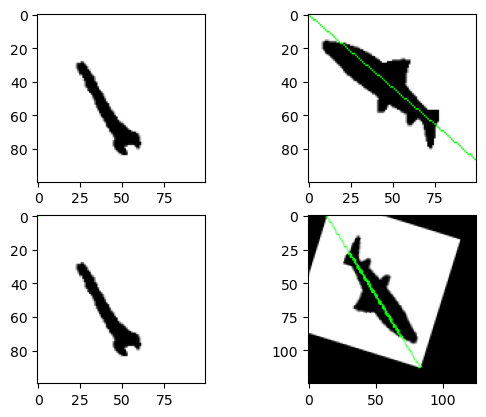

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/bunny04.png


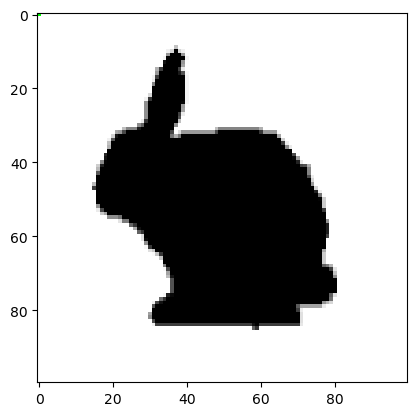

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-1.9497982526611952
-1.9497982526611952


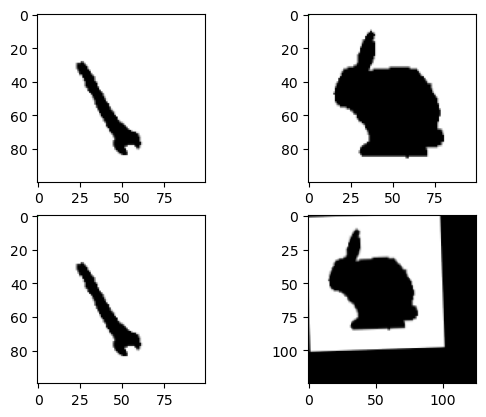

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/calf1.png


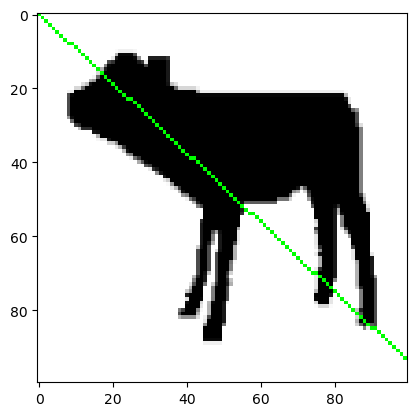

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-164.85592850737856
-164.85592850737856


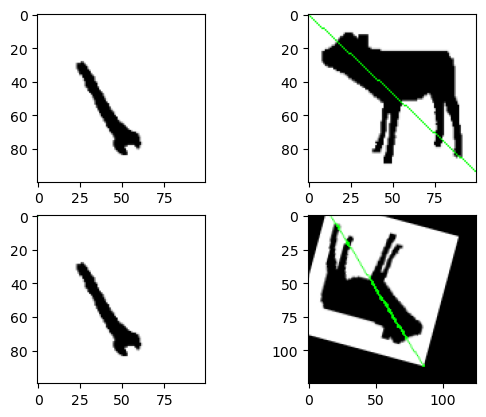

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/calf2.png


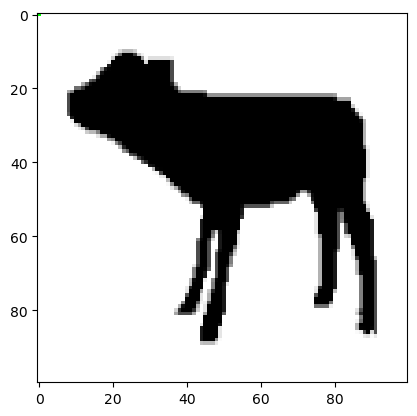

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-41.914792630802445
-41.914792630802445


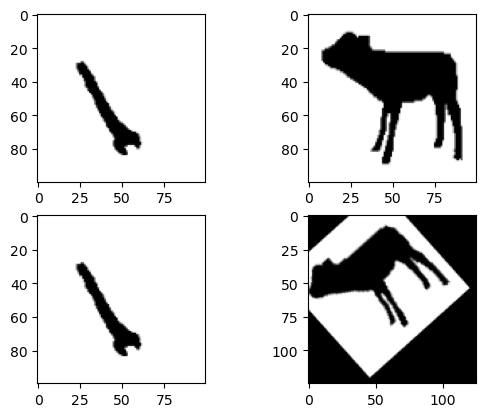

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/cat1.png


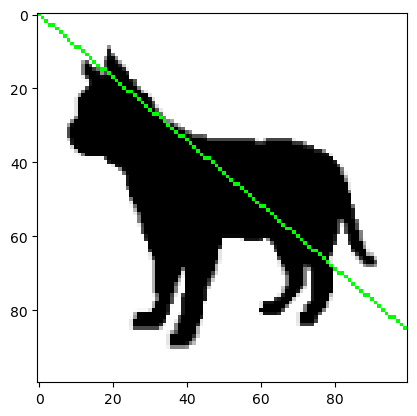

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-162.24773396865493
-162.24773396865493


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


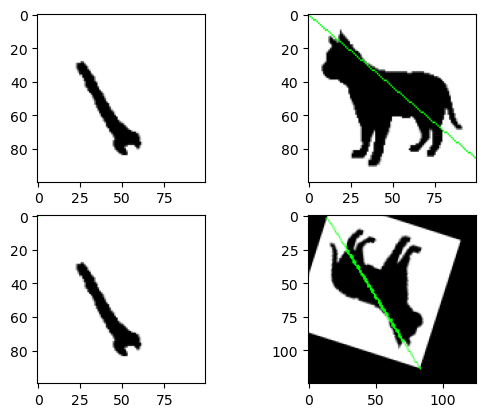

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/cat2.png


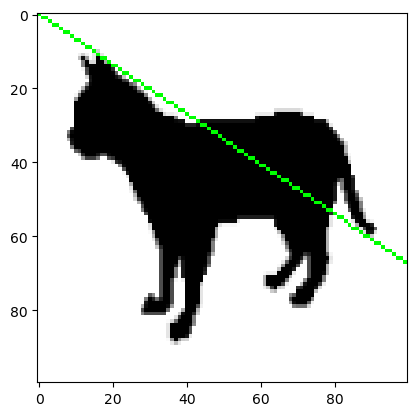

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-155.42967677672925
-155.42967677672925


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


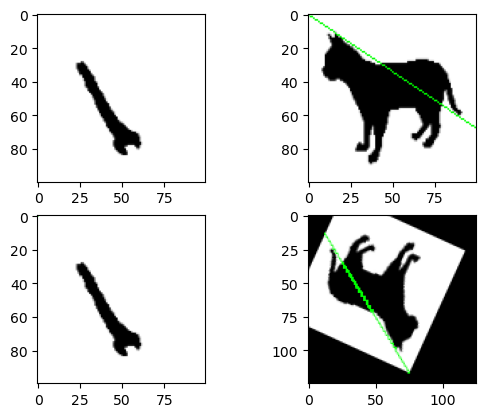

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/cow1.png


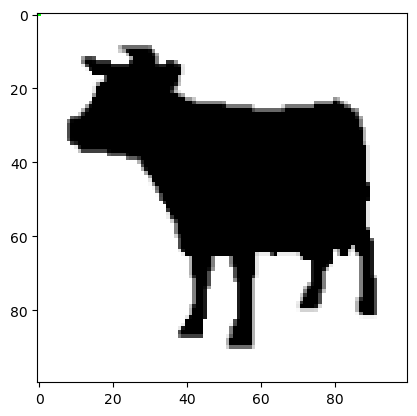

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
11.402027960544224
11.402027960544224


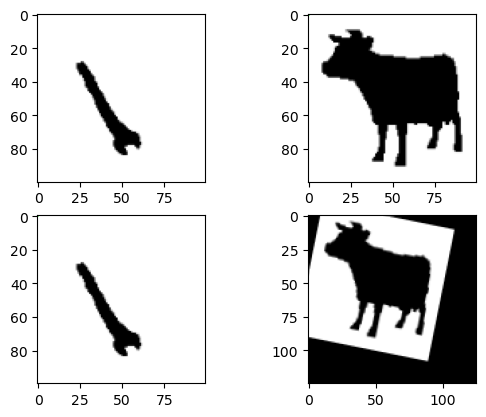

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/cow2.png


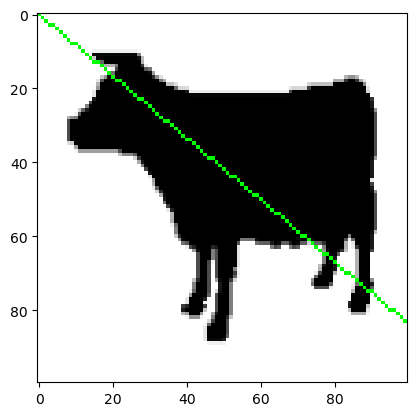

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-161.45130511374003
-161.45130511374003


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


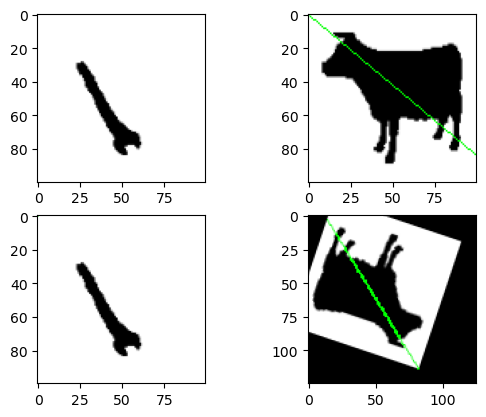

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/desertcottontail.png


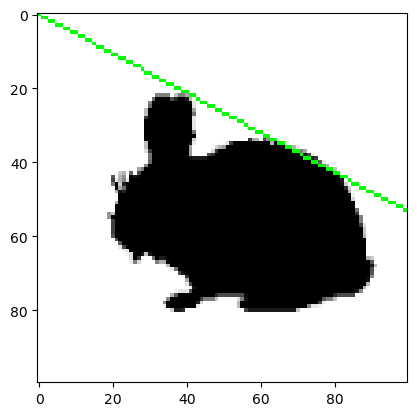

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-149.50014696961975
-149.50014696961975


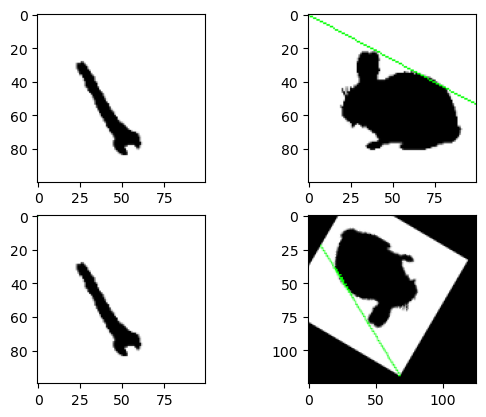

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dog1.png


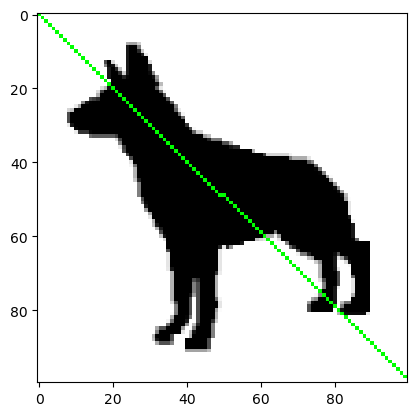

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-166.23925348405407
-166.23925348405407


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


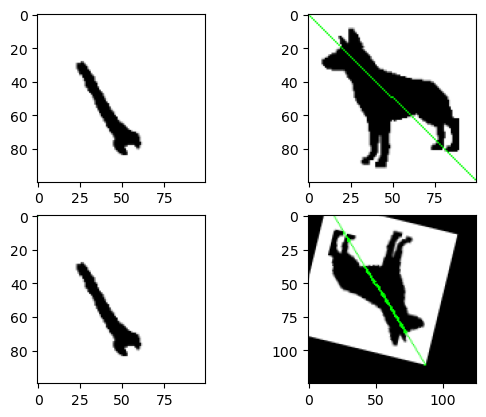

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dog2.png


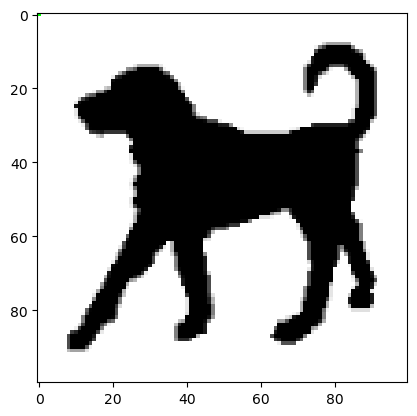

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-83.8241510291171
-83.8241510291171


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


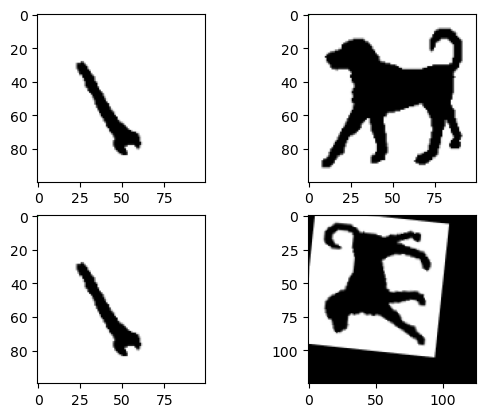

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dog3.png


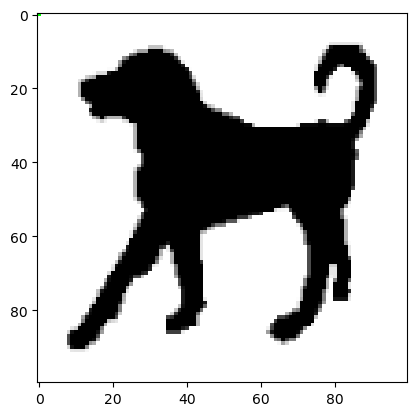

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-75.9067284646968
-75.9067284646968


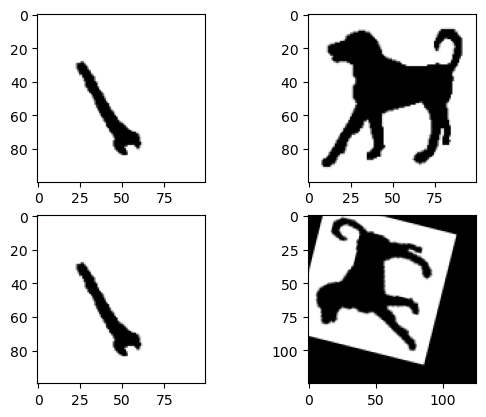

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dogfishsharks.png


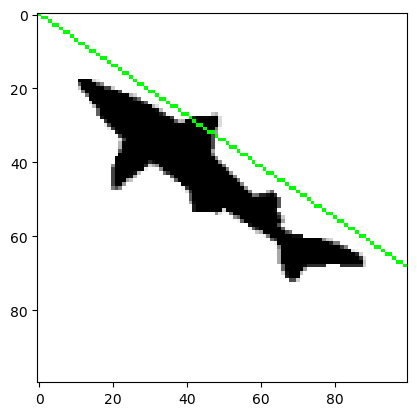

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-155.75419811667308
-155.75419811667308


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


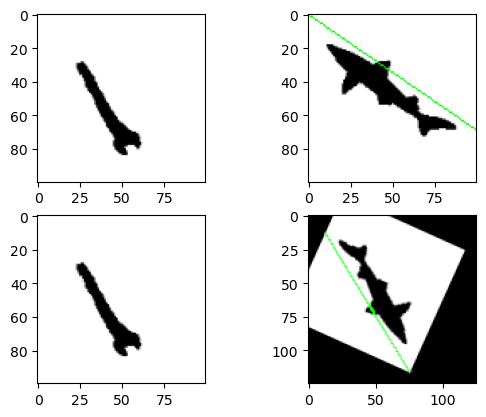

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/donkey1.png


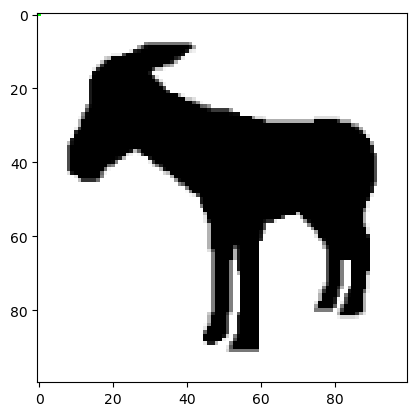

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
10.070310697552328
10.070310697552328


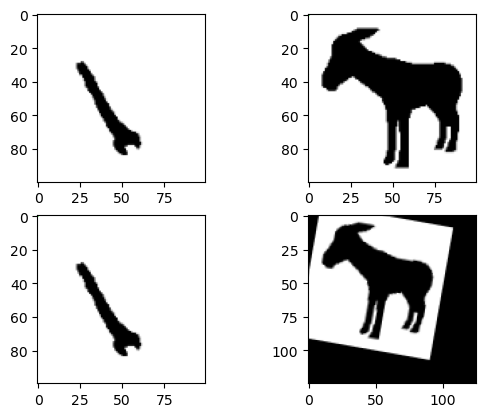

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude0.png


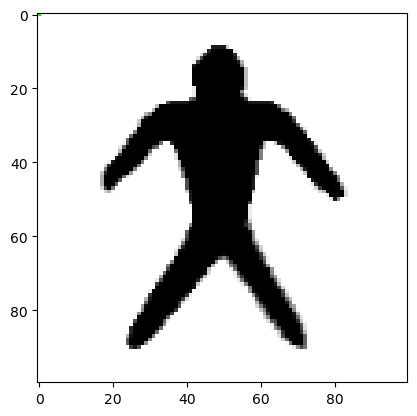

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-31.28551115089004
-31.28551115089004


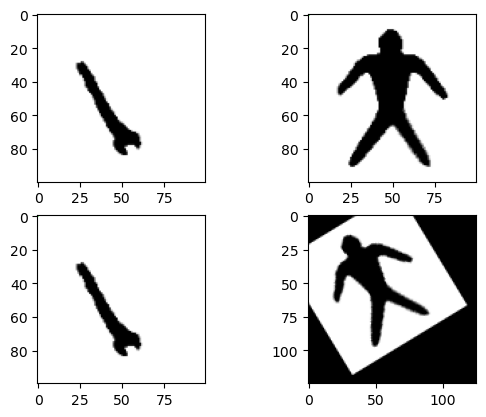

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude1.png


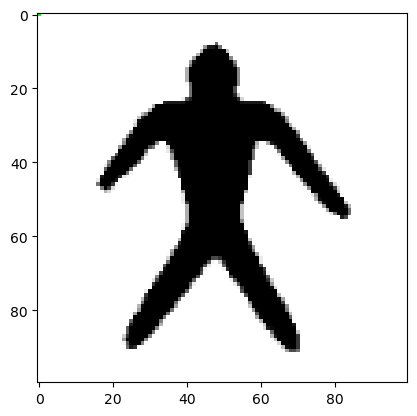

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-29.75665283730781
-29.75665283730781


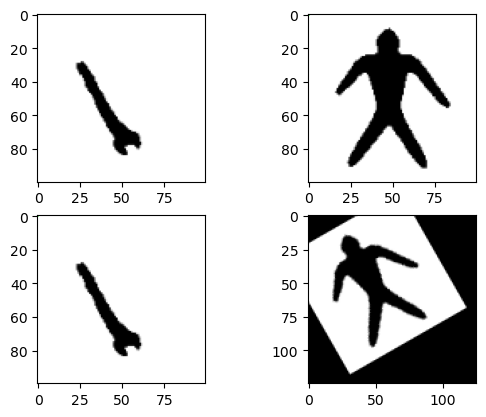

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude10.png


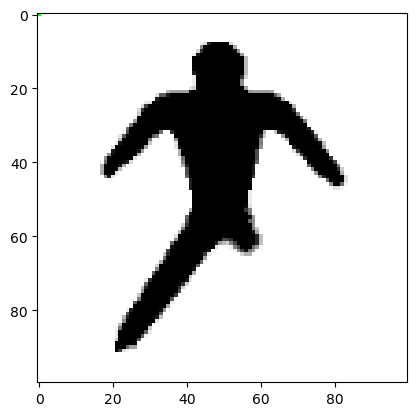

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-60.968148307315325
-60.968148307315325


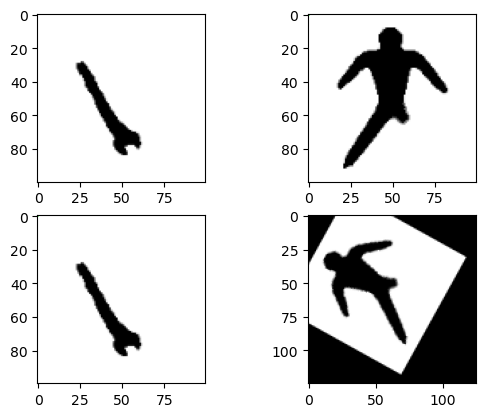

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude11.png


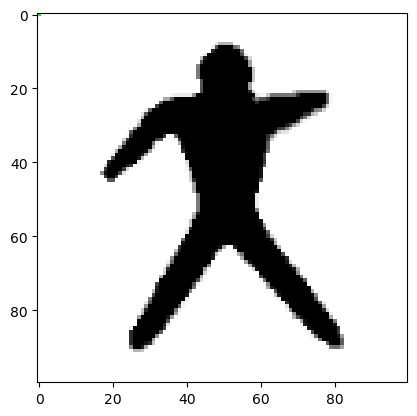

(0, 0)
-27.164464405007
-27.164464405007


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


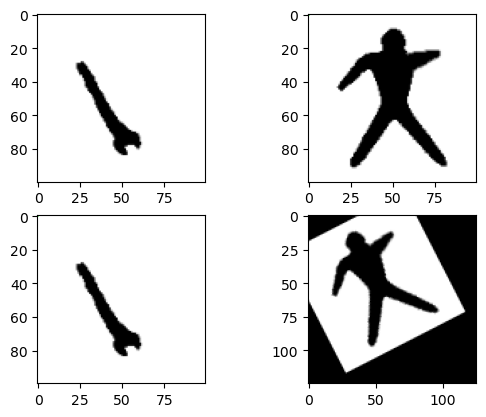

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude12.png


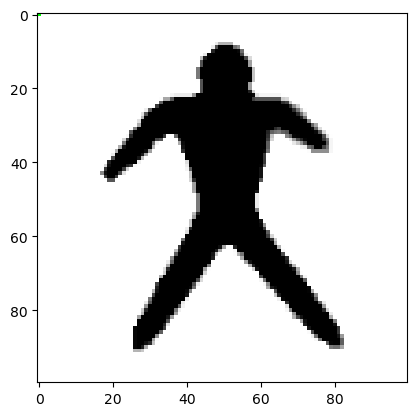

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-23.36871576524574
-23.36871576524574


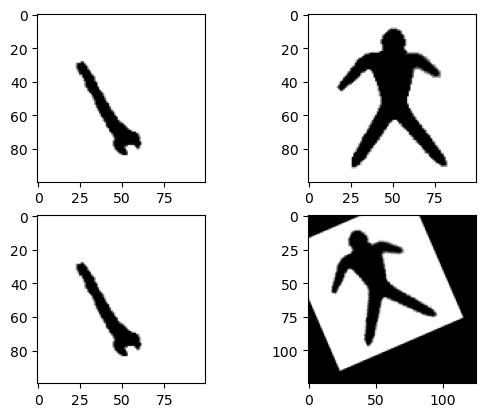

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude2.png


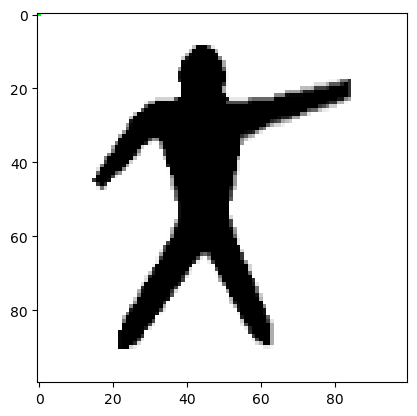

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-49.76854862450785
-49.76854862450785


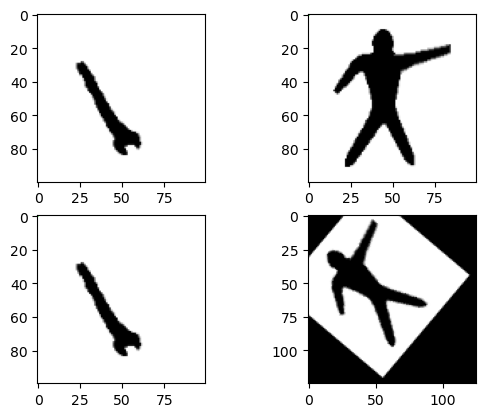

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude4.png


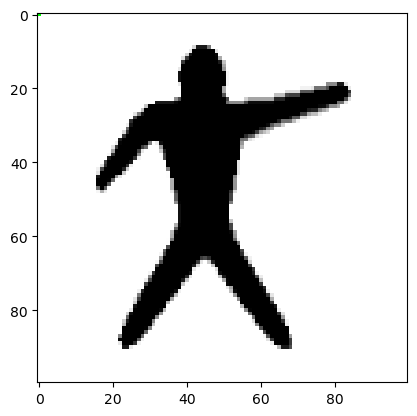

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-46.53062797742186
-46.53062797742186


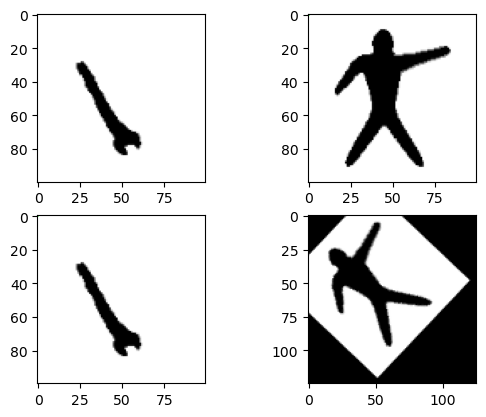

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude5.png


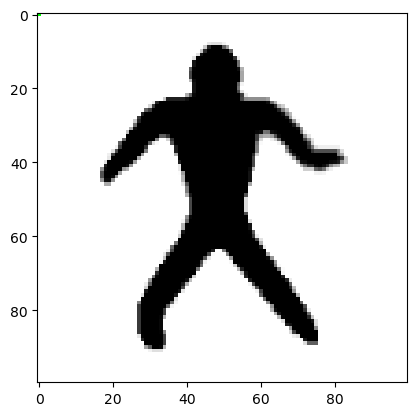

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-31.425786187172076
-31.425786187172076


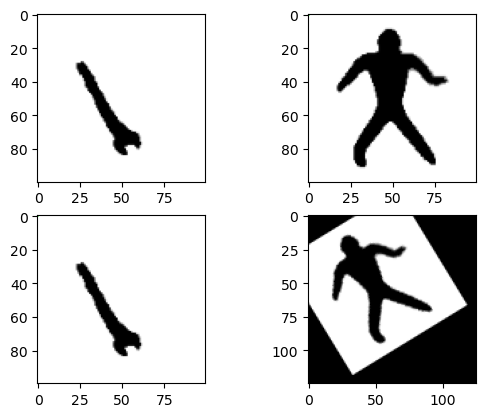

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude6.png


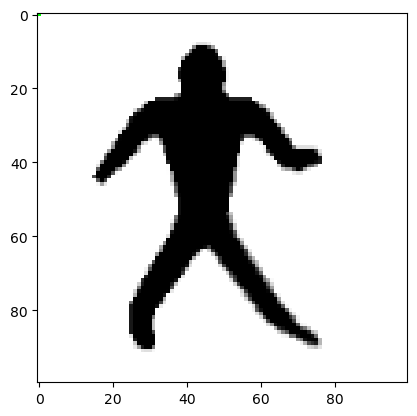

(0, 0)
-25.526764963399522
-25.526764963399522


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


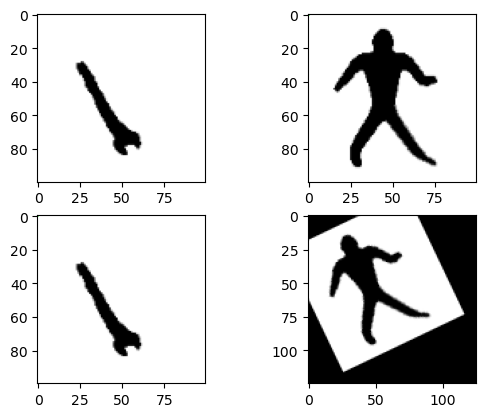

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude7.png


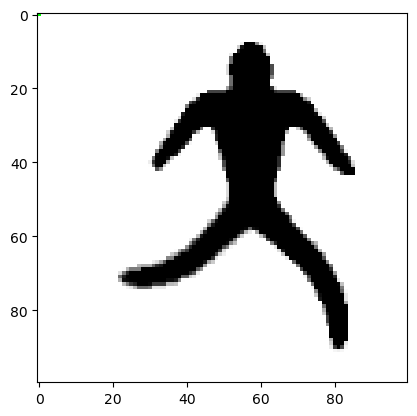

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-18.963314679611788
-18.963314679611788


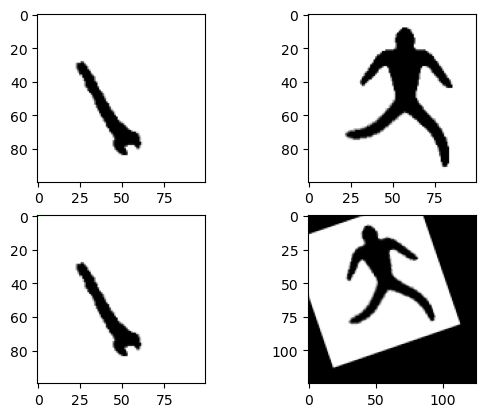

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/dude8.png


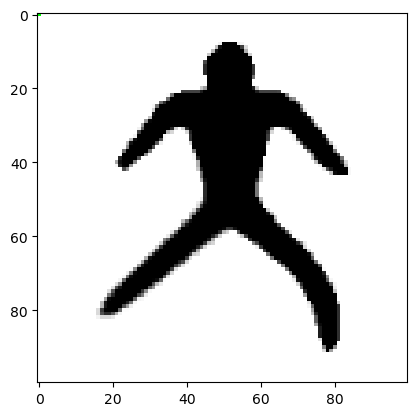

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-16.432259418742333
-16.432259418742333


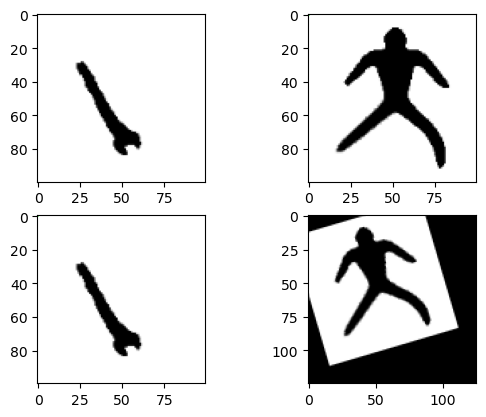

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/easterncottontail.png


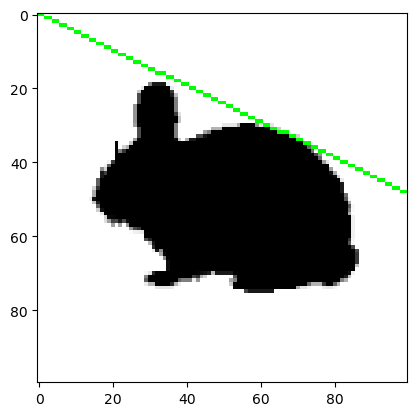

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-147.0555630630435
-147.0555630630435


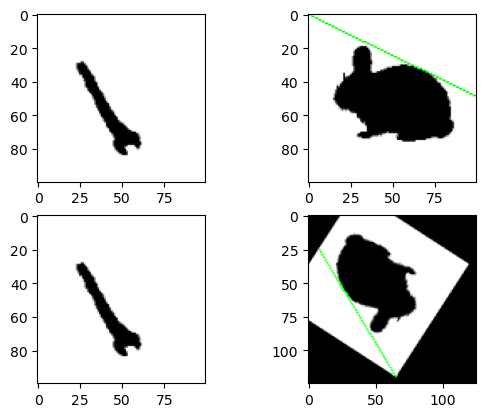

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/f15.png


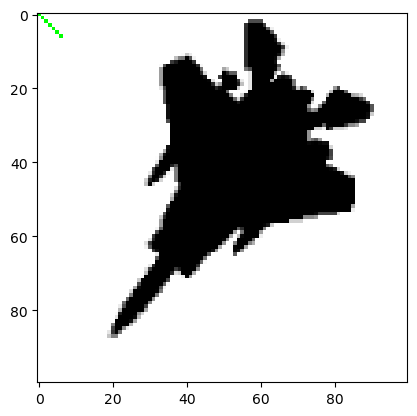

/tmp/ipykernel_3456368/1005974111.py:66: RuntimeWarning: invalid value encountered in scalar divide
  costheta = np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
nan
nan


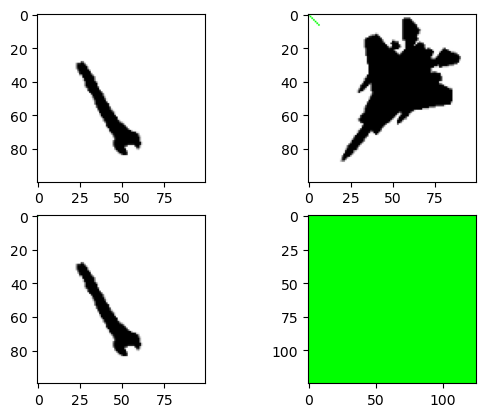

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/f16.png


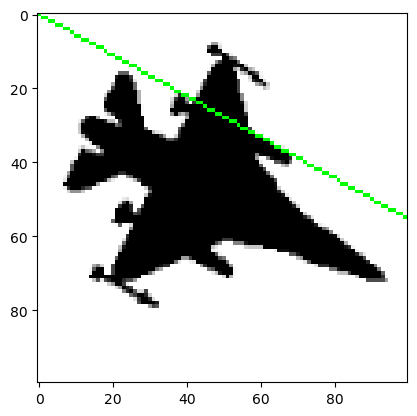

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-150.3414434983122
-150.3414434983122


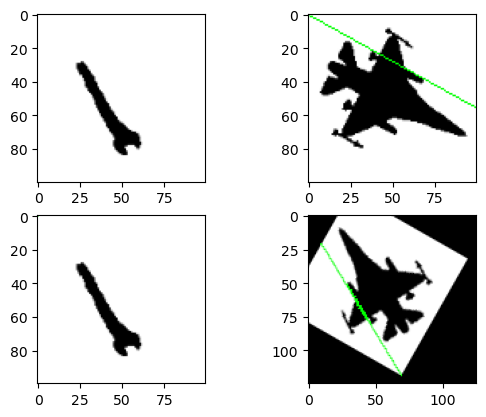

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/f16occ1.png


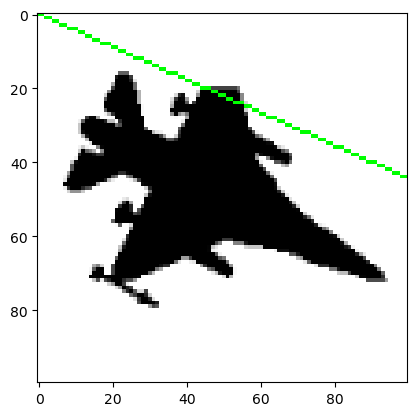

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-145.56956723565733
-145.56956723565733


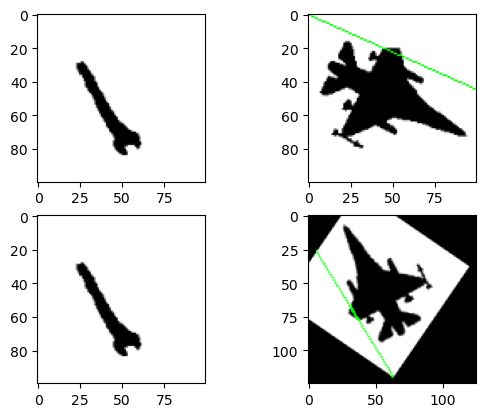

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen1ap.png


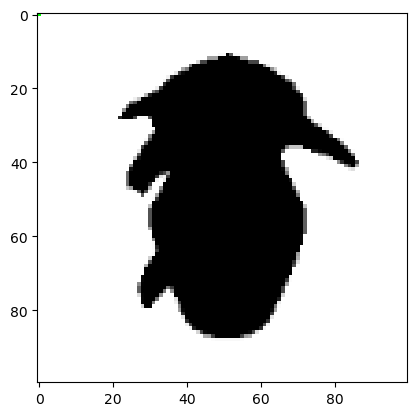

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-44.53632849912942
-44.53632849912942


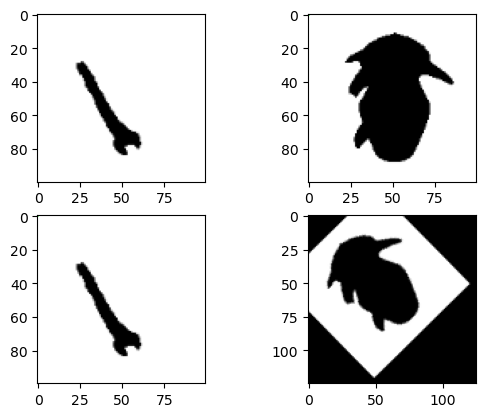

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen1bp.png


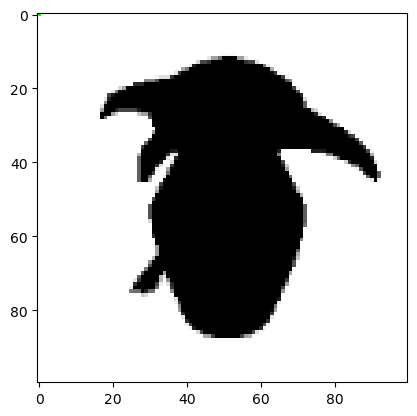

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-41.93296322079844
-41.93296322079844


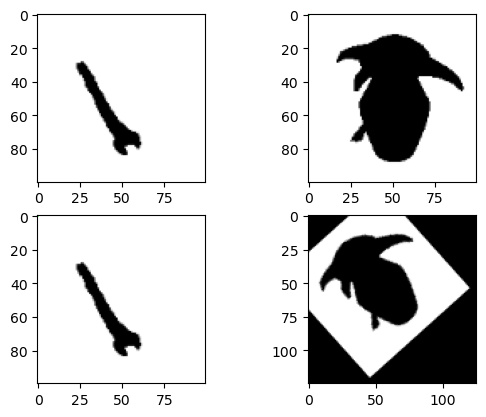

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen1ep.png


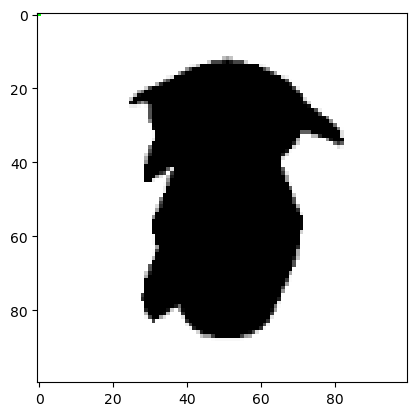

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-42.12031247389437
-42.12031247389437


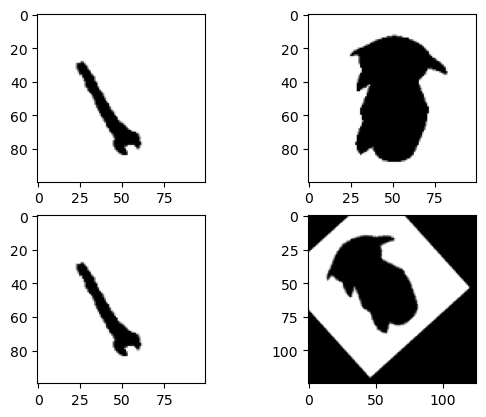

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen1fp.png


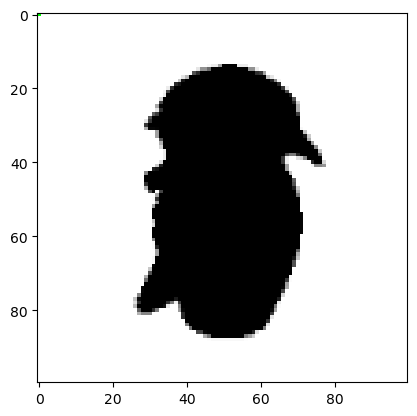

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-41.89568851598496
-41.89568851598496


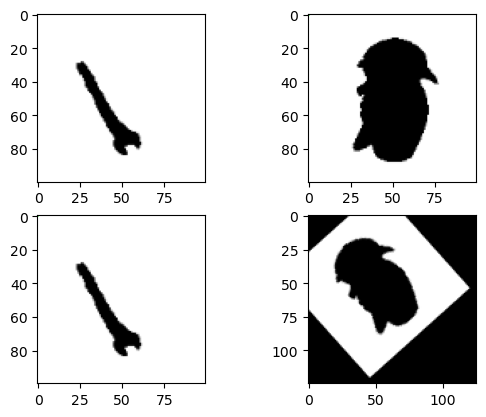

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen2dp.png


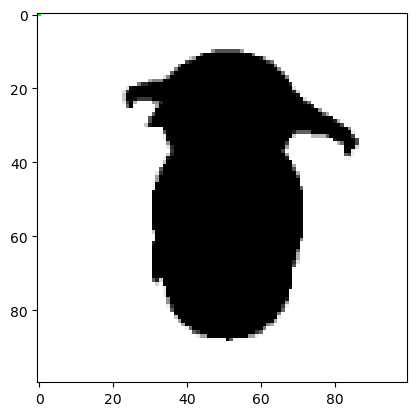

(0, 0)
-34.109680959933875
-34.109680959933875


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


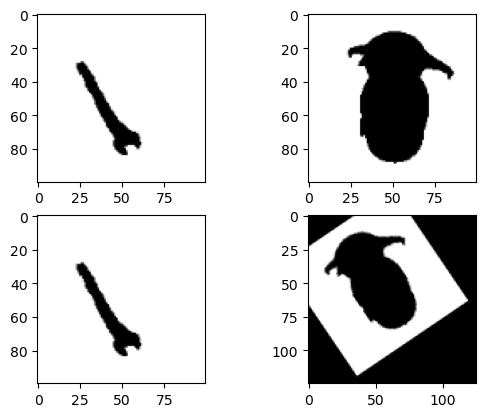

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen2fp.png


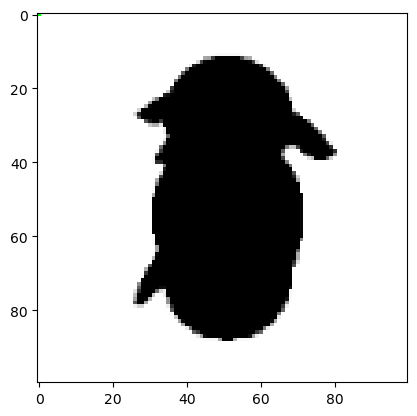

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-39.462770558575
-39.462770558575


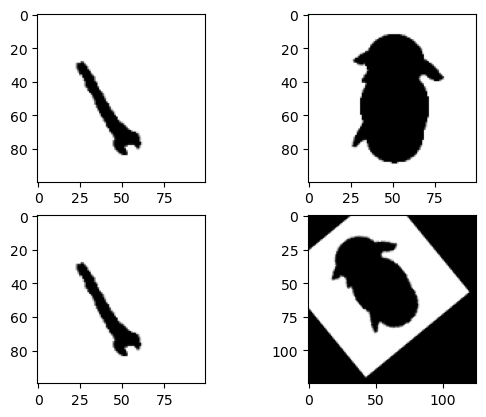

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen3bp.png


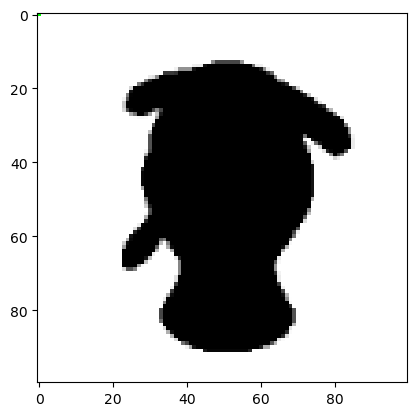

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-37.88652842390448
-37.88652842390448


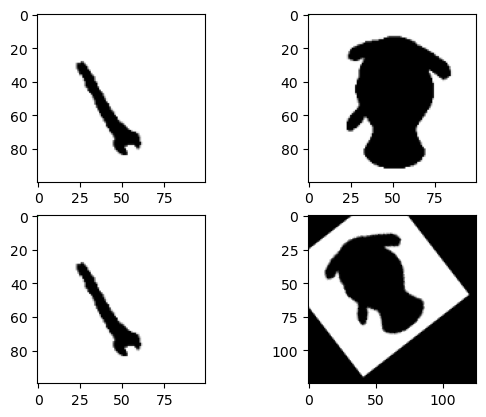

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fgen5cp.png


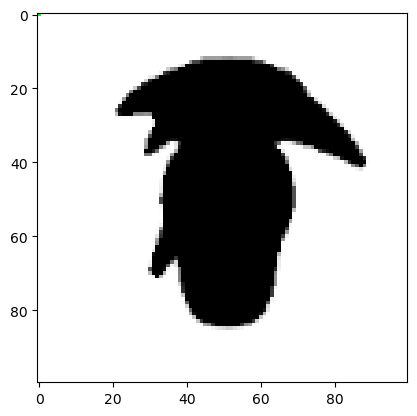

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-38.91819076650186
-38.91819076650186


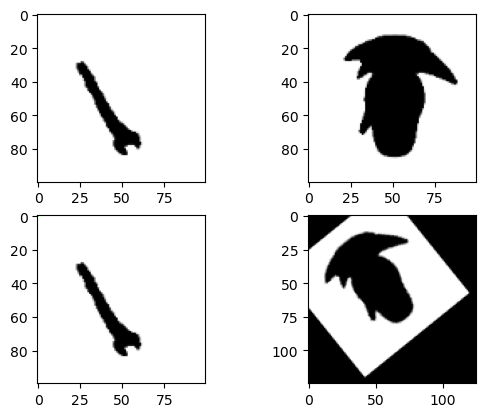

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fish14.png


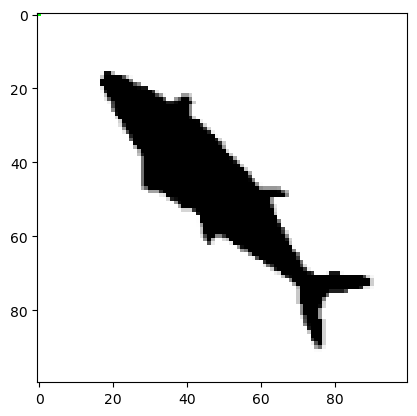

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
13.188209611435383
13.188209611435383


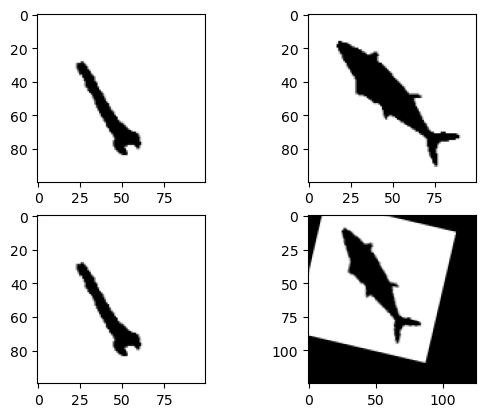

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fish23.png


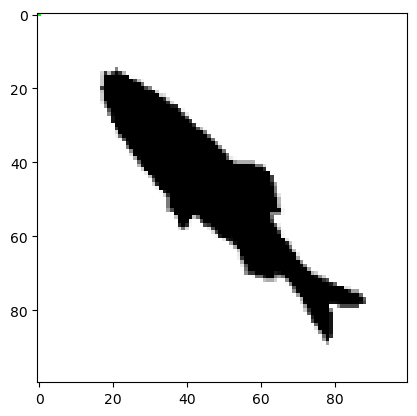

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
12.946219202237
12.946219202237


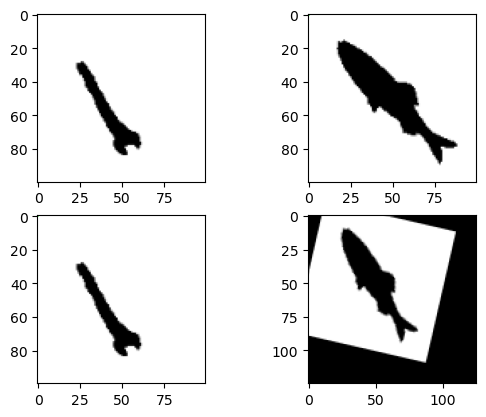

./KIMIA dataset/fish28.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


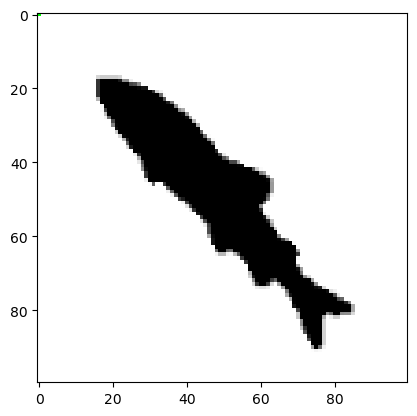

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
10.711873246204803
10.711873246204803


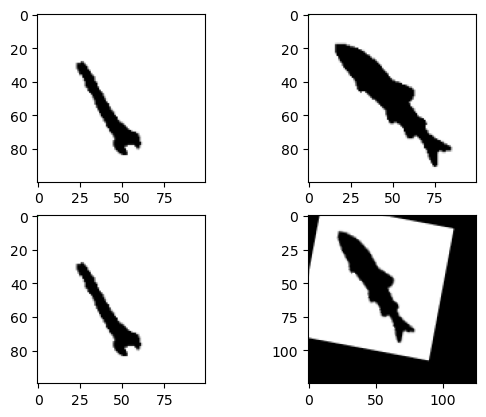

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fish30.png


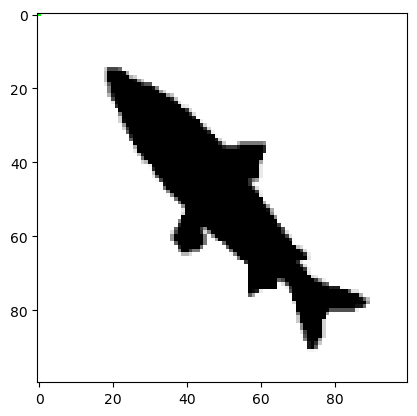

(0, 0)
9.892586587477467
9.892586587477467


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


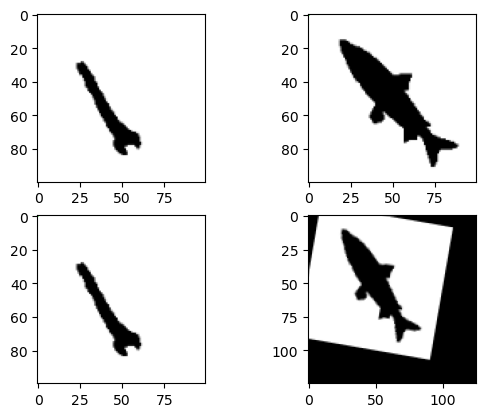

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/fox1.png


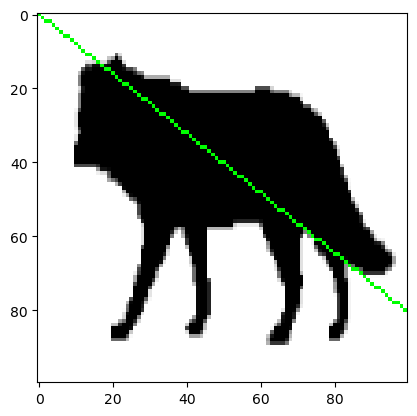

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-160.6499926727854
-160.6499926727854


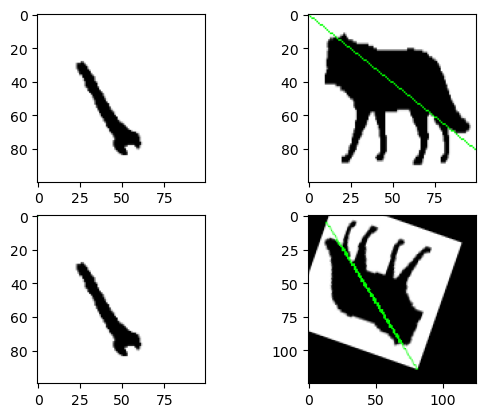

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand.png


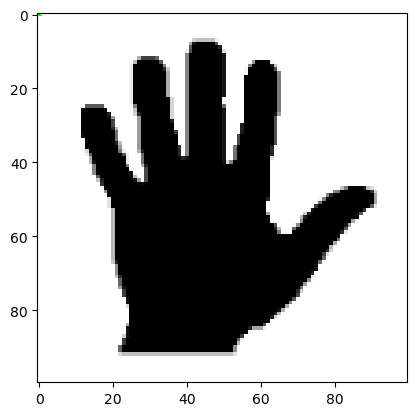

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-19.520886305868093
-19.520886305868093


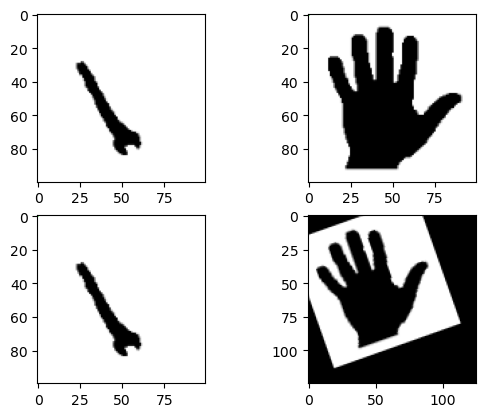

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand2.png


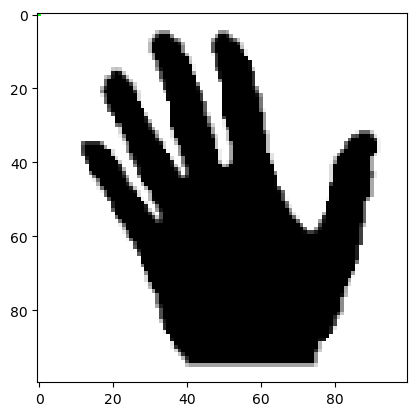

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
2.413069016793991
2.413069016793991


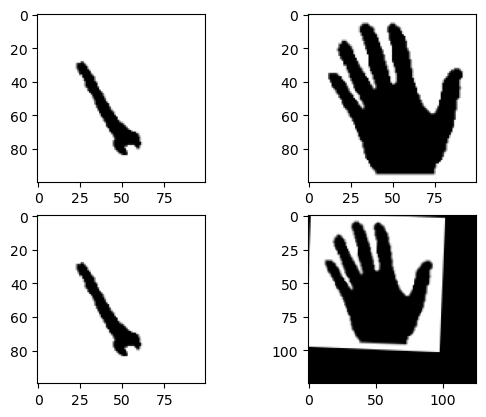

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand2occ1.png


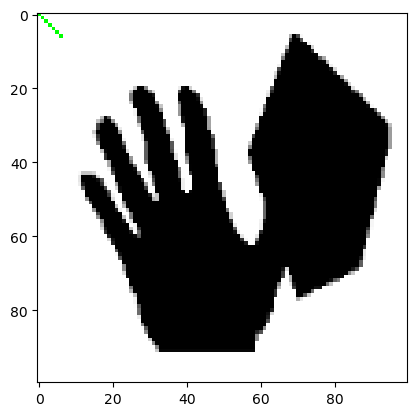

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
nan
nan


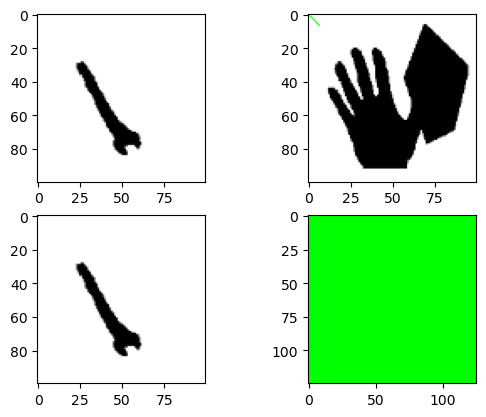

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand2occ2.png


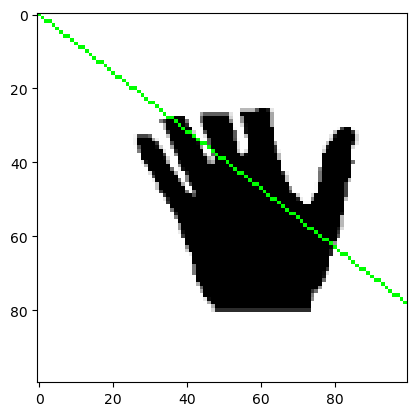

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-159.82736091803795
-159.82736091803795


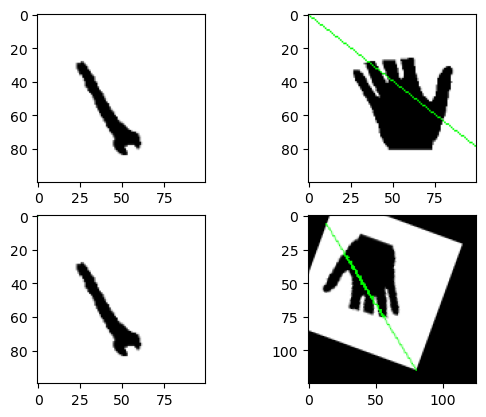

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand2occ3.png


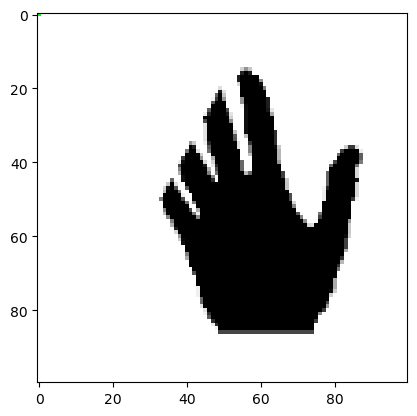

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
148.42519544237766
148.42519544237766


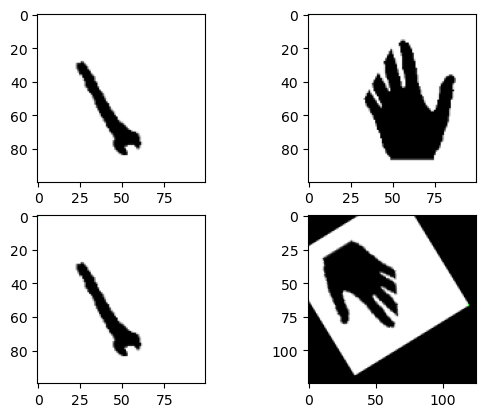

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand3.png


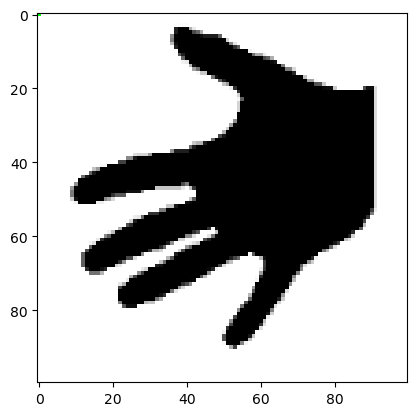

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-75.72066105566238
-75.72066105566238


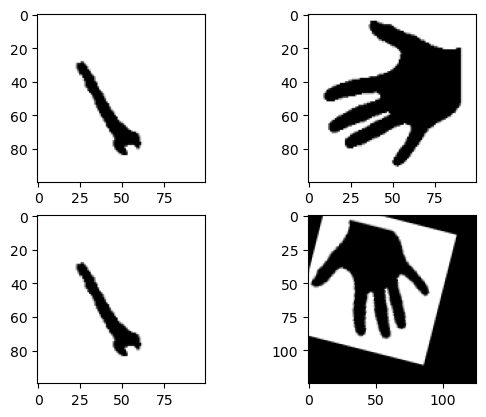

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/hand90.png


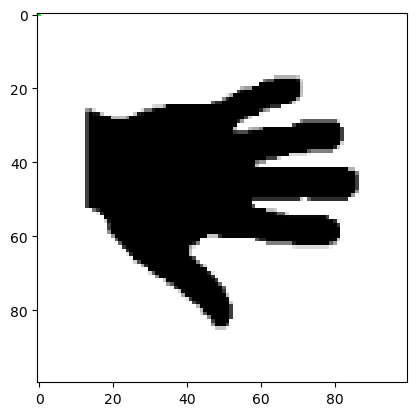

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-111.3638565120163
-111.3638565120163


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


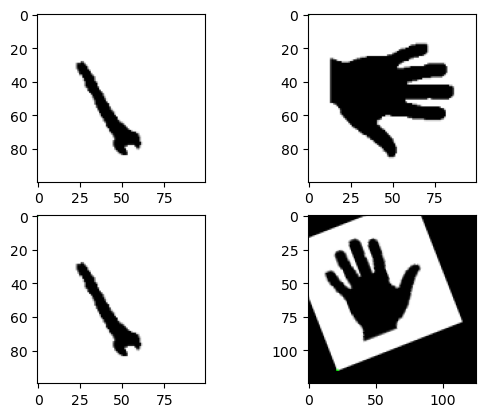

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/handbent1.png


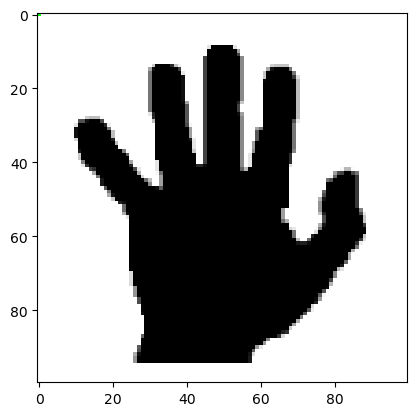

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-22.739861714285606
-22.739861714285606


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


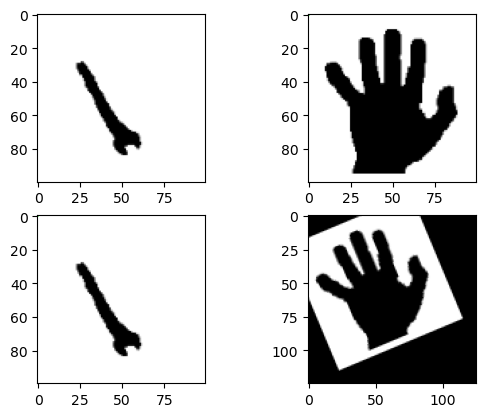

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/handbent2.png


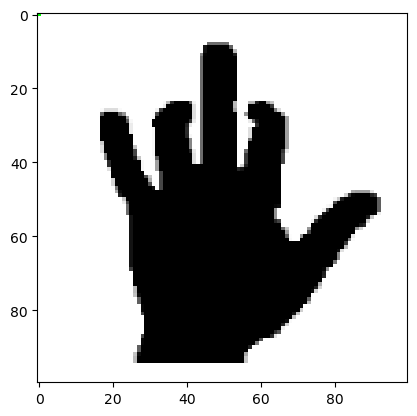

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-20.184562734317137
-20.184562734317137


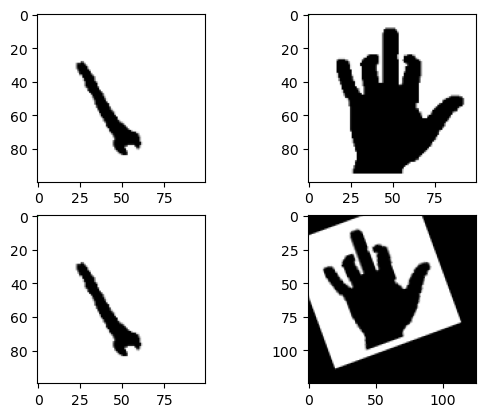

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/handdeform.png


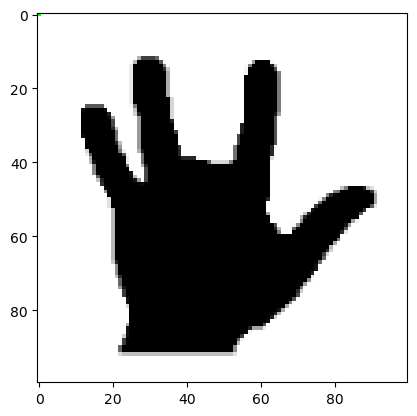

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-7.628816952760627
-7.628816952760627


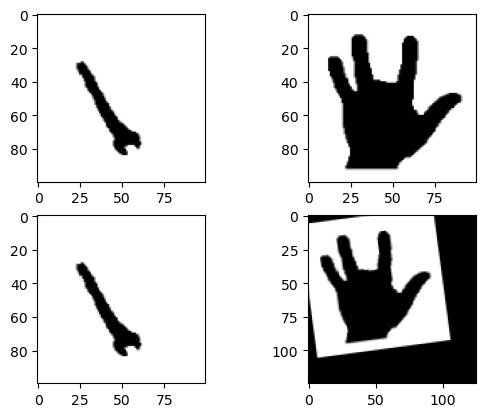

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/handdeform2.png


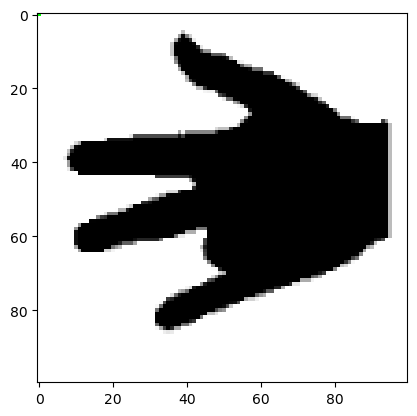

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-108.25109168496529
-108.25109168496529


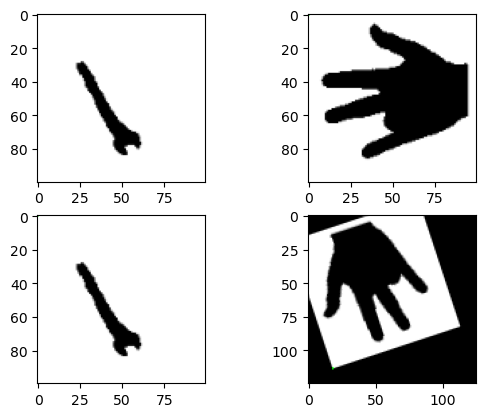

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/harrier.png


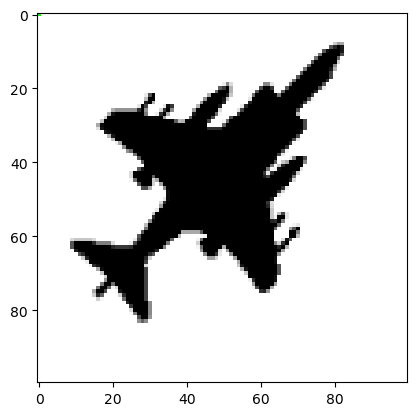

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-75.45125577456433
-75.45125577456433


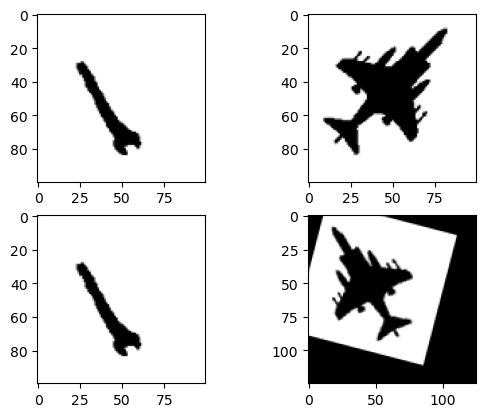

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/harrierocc1.png


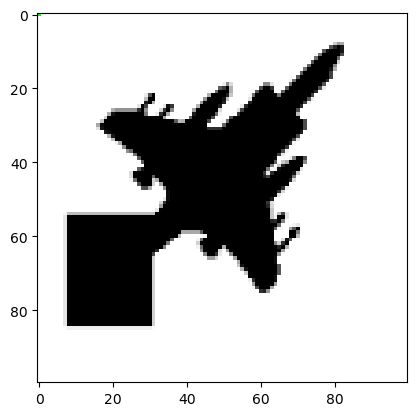

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-77.54150218341411
-77.54150218341411


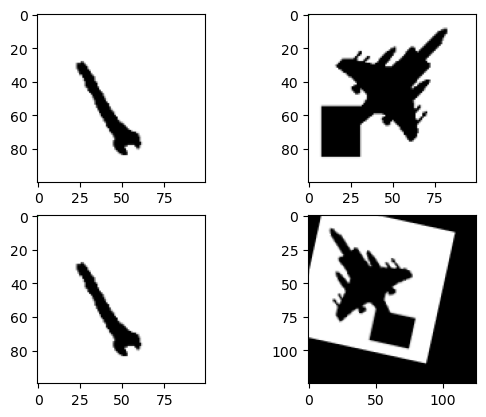

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/harrierocc2.png


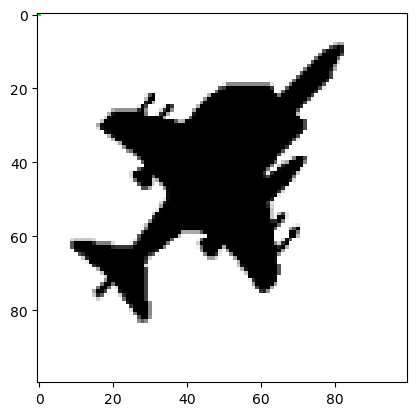

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-76.96121771597167
-76.96121771597167


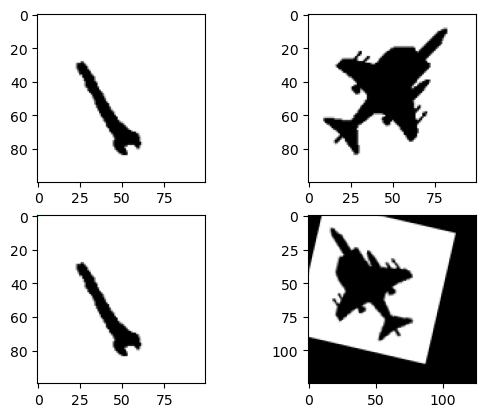

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/harrierocc3.png


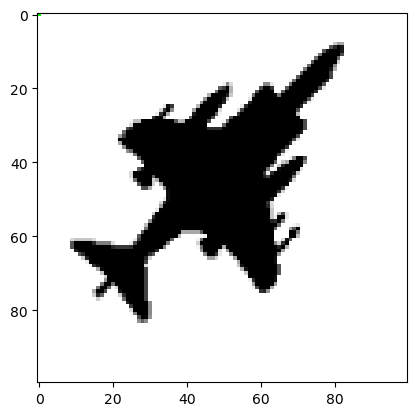

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-75.4591689862032
-75.4591689862032


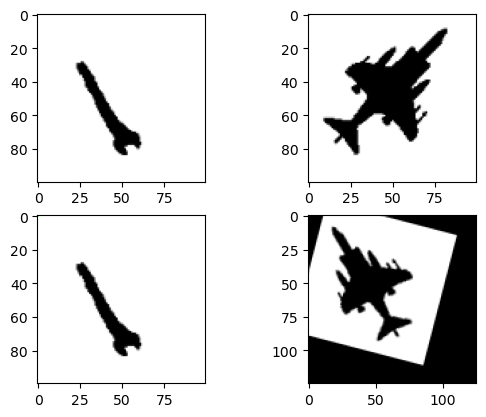

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/herrings.png


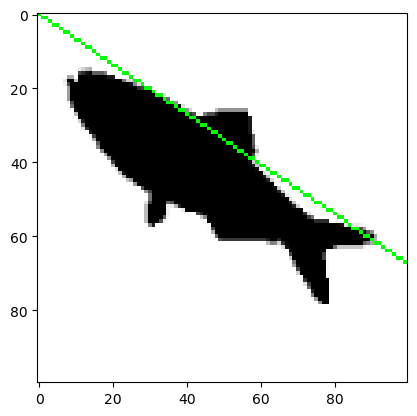

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-155.56223854022187
-155.56223854022187


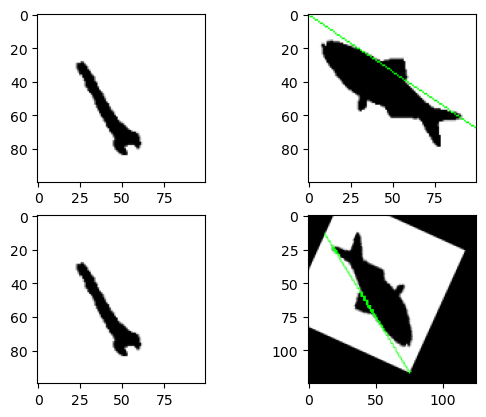

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0728.png


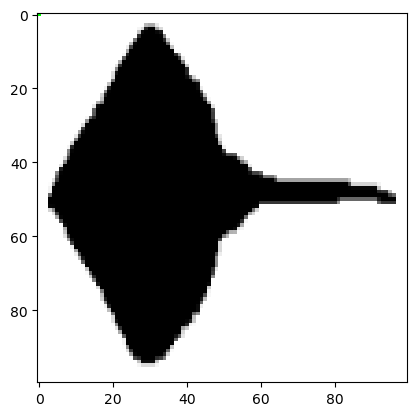

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-117.4173868093207
-117.4173868093207


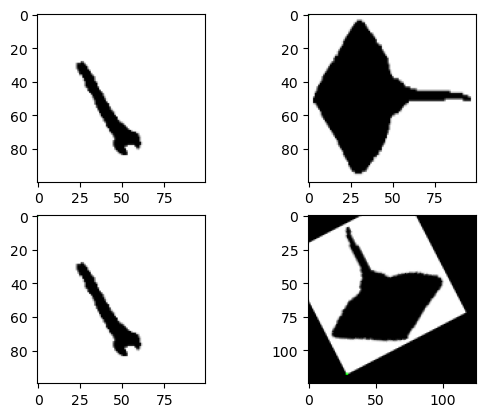

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0729.png


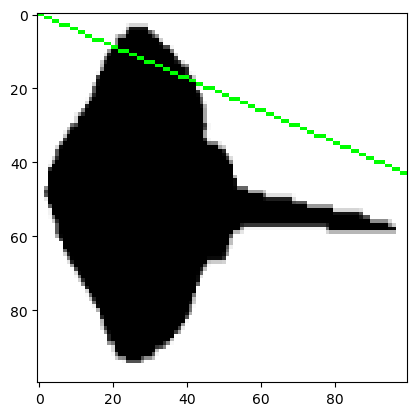

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-144.6227599173783
-144.6227599173783


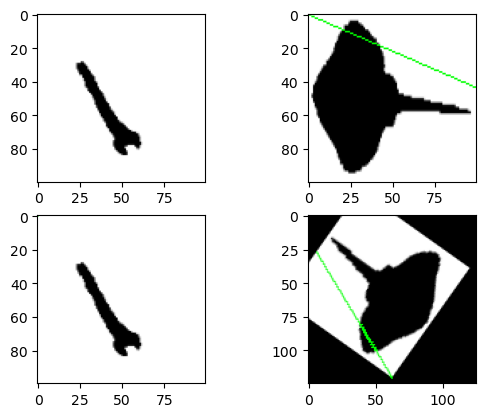

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0731.png


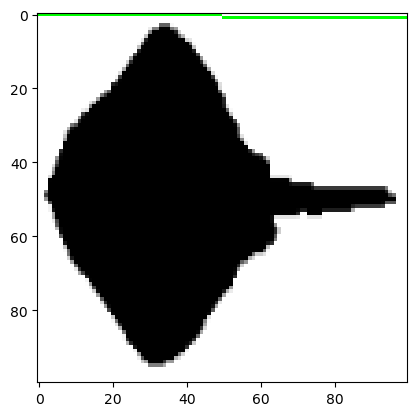

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-122.03161667094246
-122.03161667094246


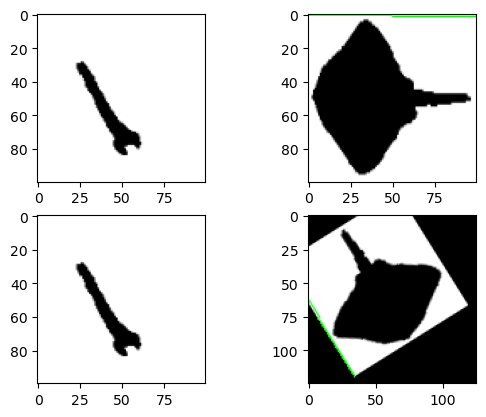

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0732.png


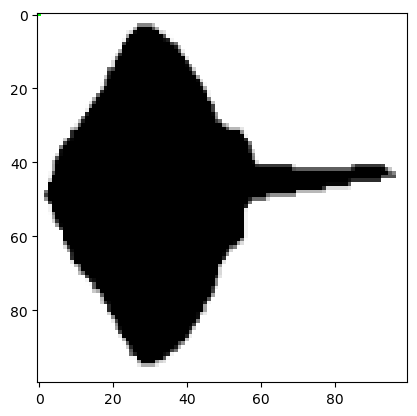

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-101.40221521857951
-101.40221521857951


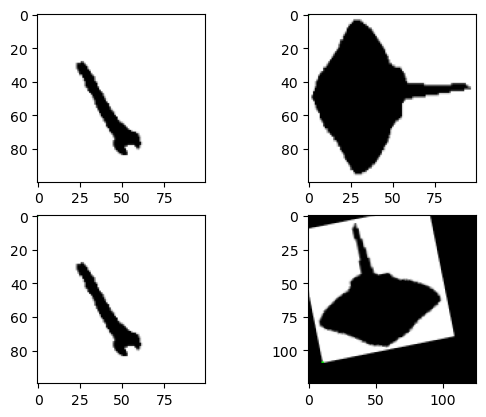

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0735.png


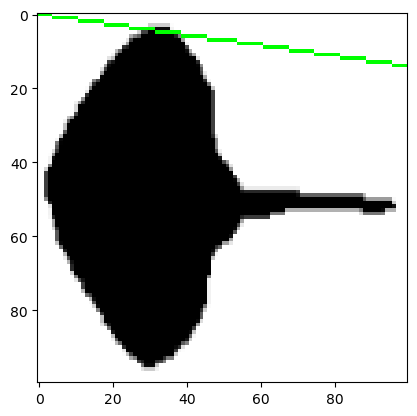

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-129.61611901325463
-129.61611901325463


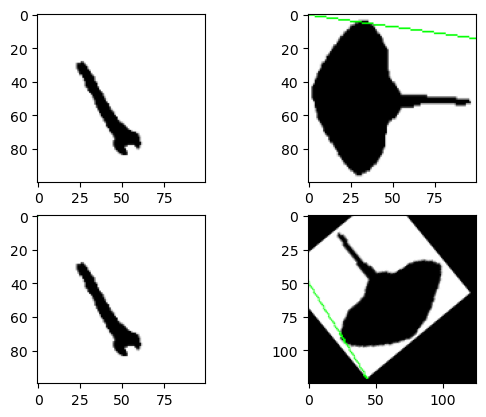

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0736.png


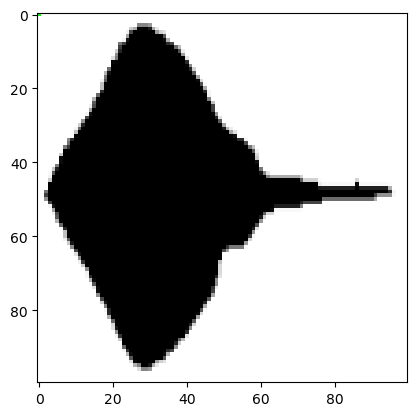

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-119.34082317577428
-119.34082317577428


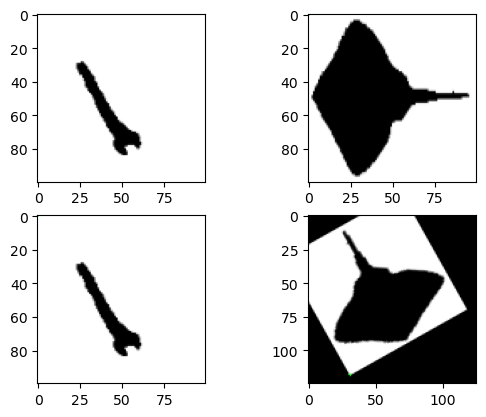

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0737.png


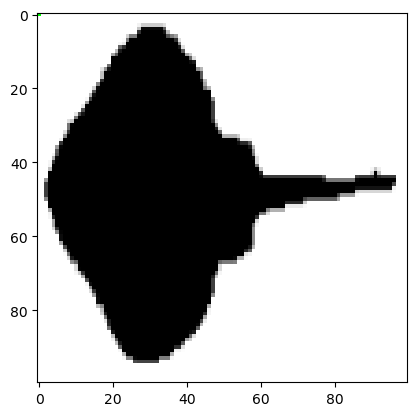

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-115.42817947375234
-115.42817947375234


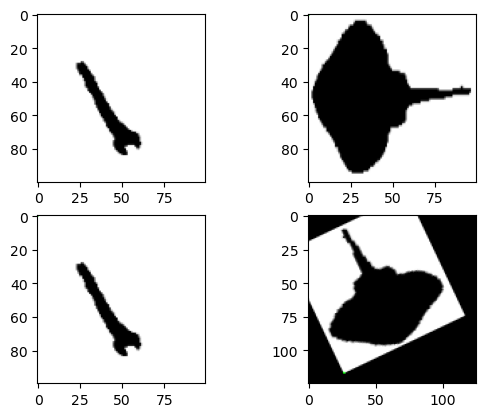

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0738.png


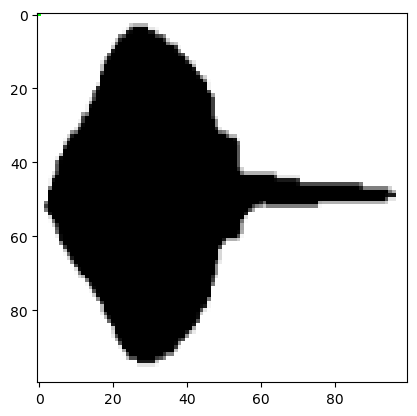

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-120.846148531268
-120.846148531268


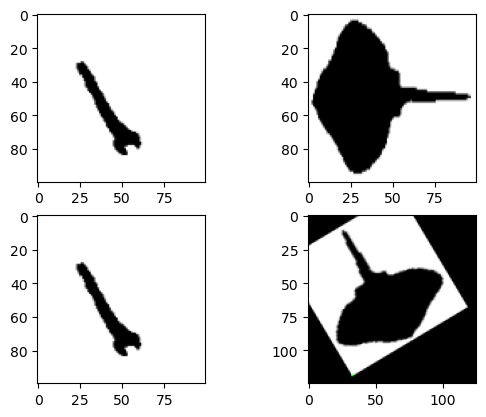

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0739.png


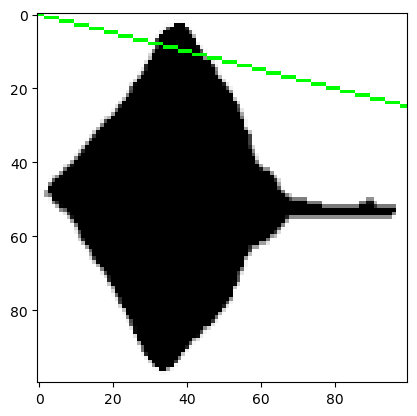

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-135.22773628583946
-135.22773628583946


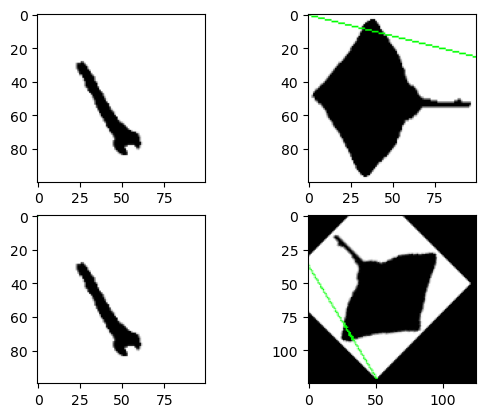

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0740.png


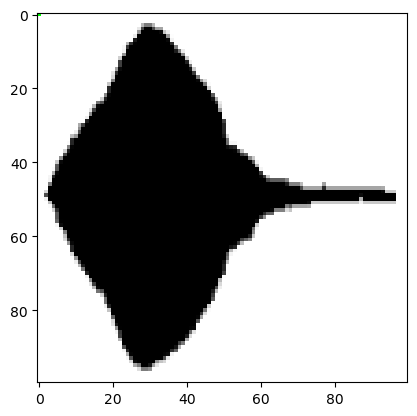

(0, 0)
-121.0475598944196
-121.0475598944196


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


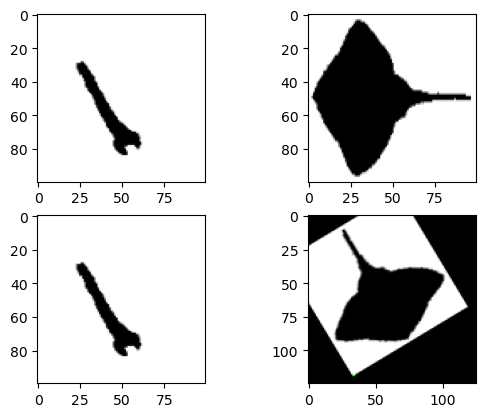

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/kk0741.png


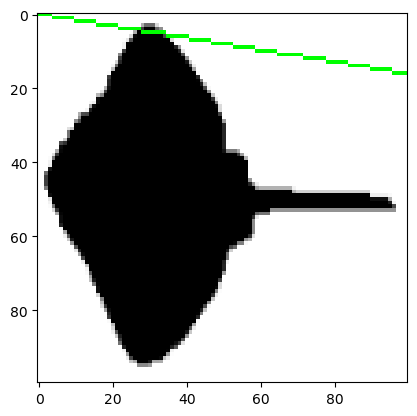

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-130.31116187453594
-130.31116187453594


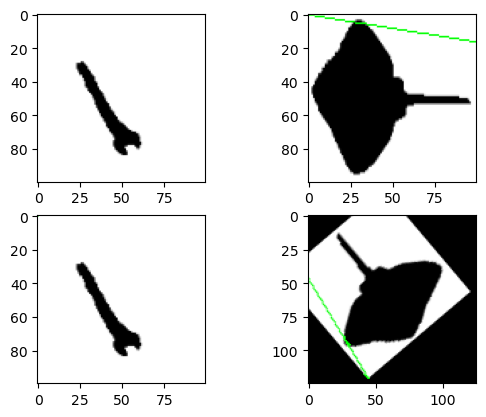

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/marshrabbit.png


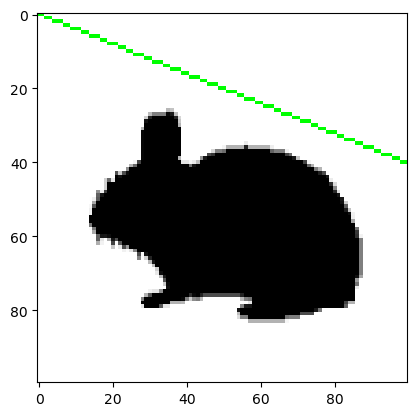

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-143.1486495462589
-143.1486495462589


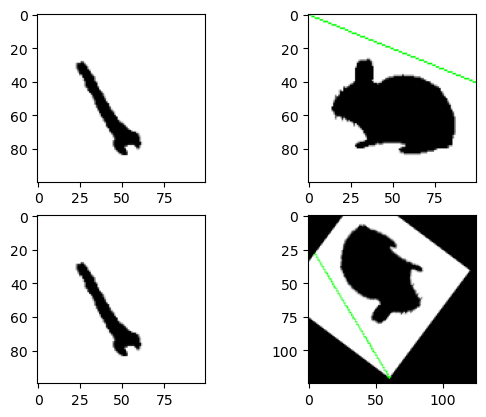

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mgen1bp.png


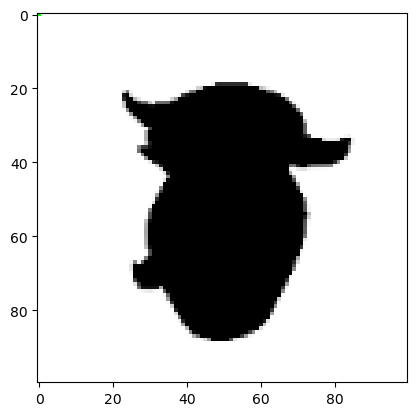

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-40.697772229228484
-40.697772229228484


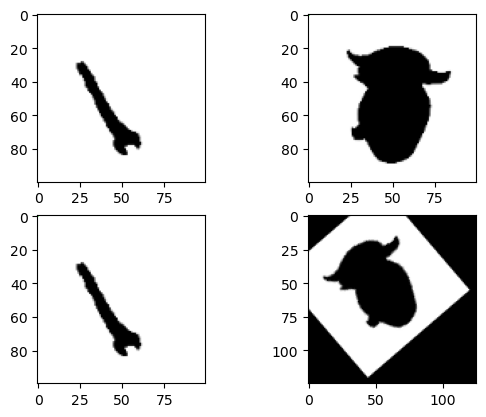

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mgen2ap.png


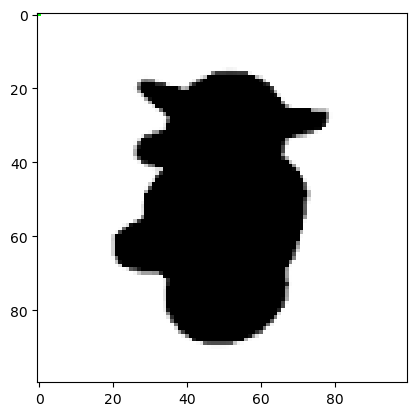

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-37.959550526748636
-37.959550526748636


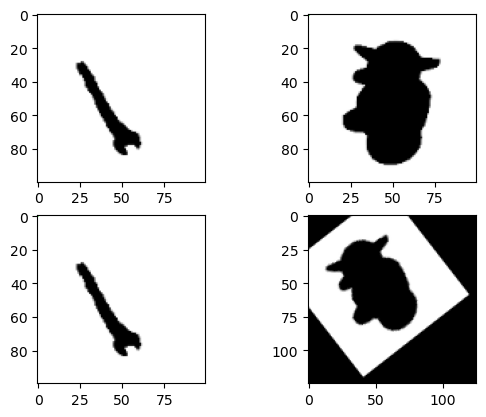

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mgen2fp.png


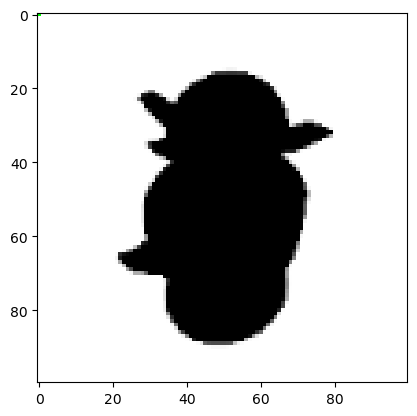

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-39.40878298967533
-39.40878298967533


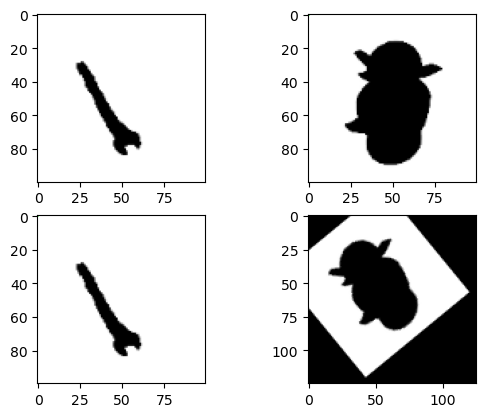

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mountaincottontail.png


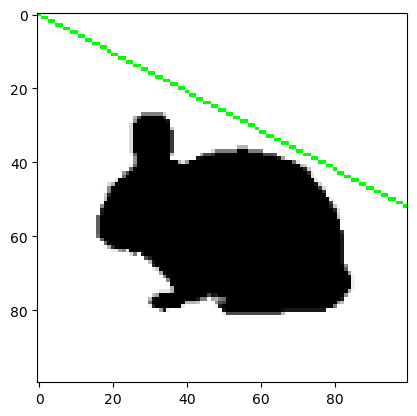

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-149.04834986154432
-149.04834986154432


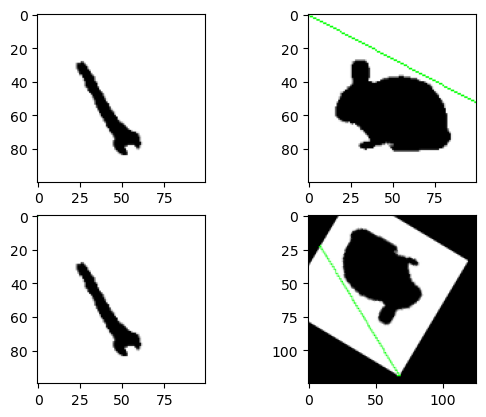

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mountaincottontailocc1.png


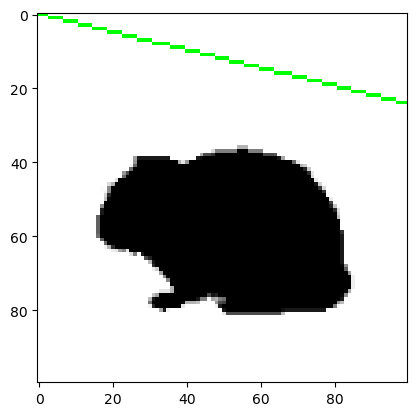

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-135.2604342254567
-135.2604342254567


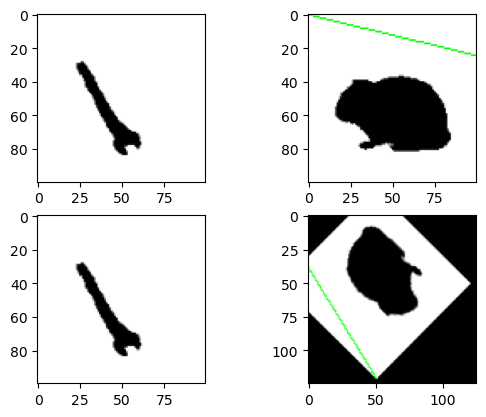

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mountaincottontailocc2.png


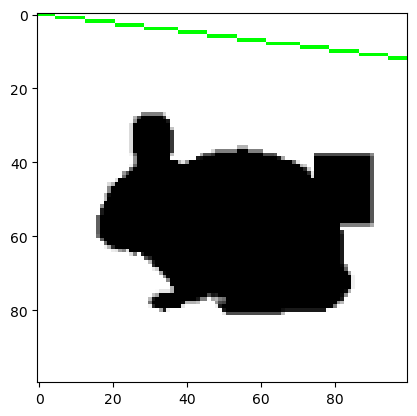

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-128.31708691629314
-128.31708691629314


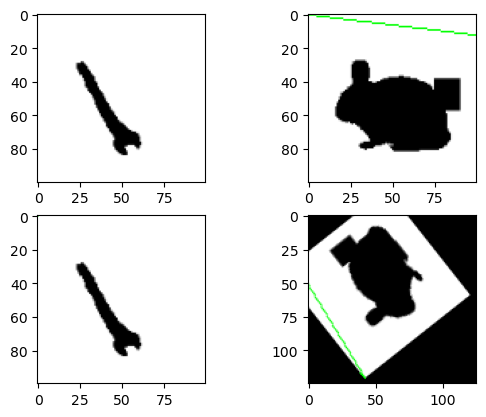

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mountaincottontailrot.png


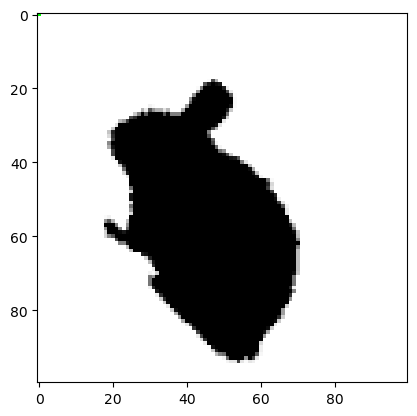

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-10.7507109103718
-10.7507109103718


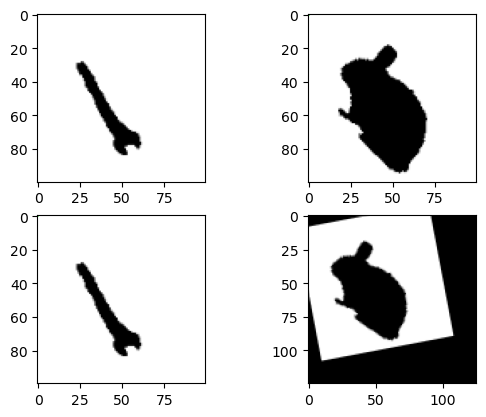

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/mullets.png


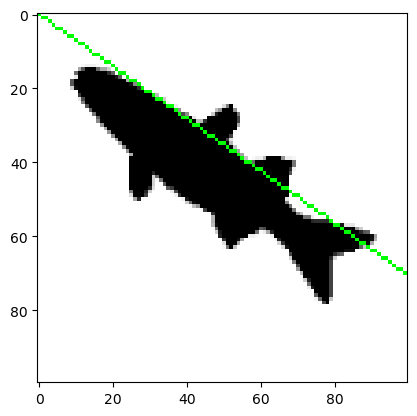

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-156.45926761392653
-156.45926761392653


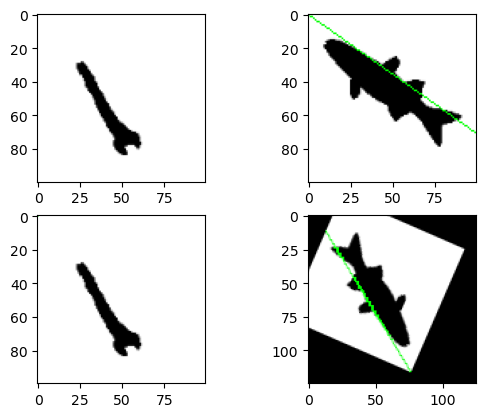

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/phantom.png


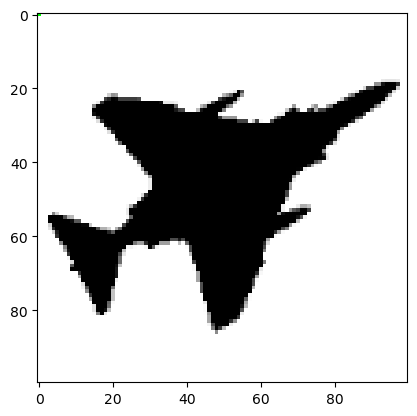

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-91.35487329778692
-91.35487329778692


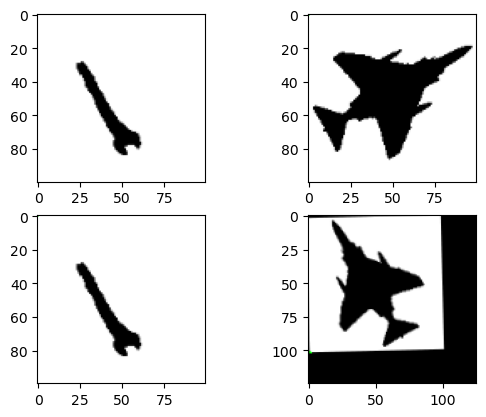

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/phantomocc1.png


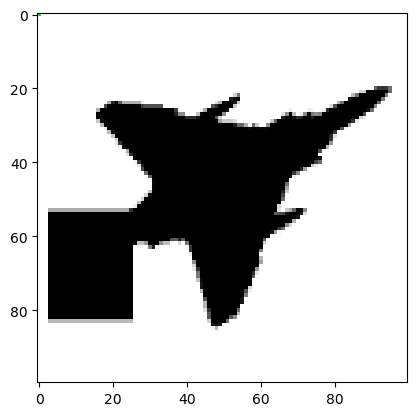

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-88.73714405550756
-88.73714405550756


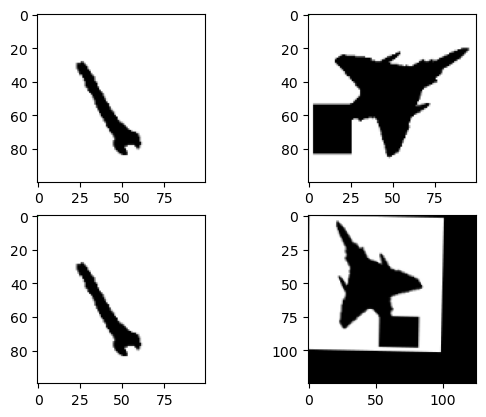

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/pygmyrabbit.png


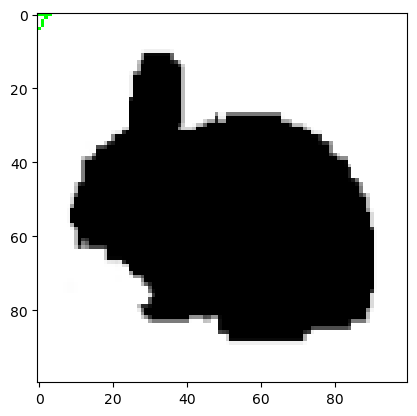

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-121.57480455762231
-121.57480455762231


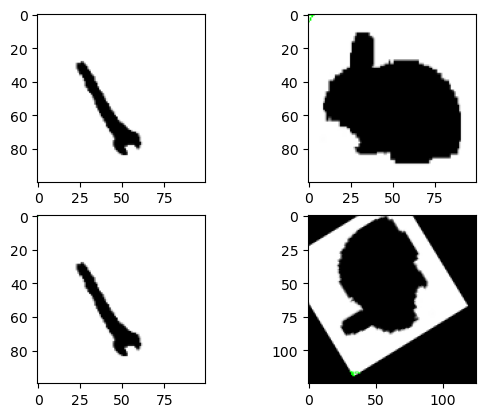

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/skyhawk.png


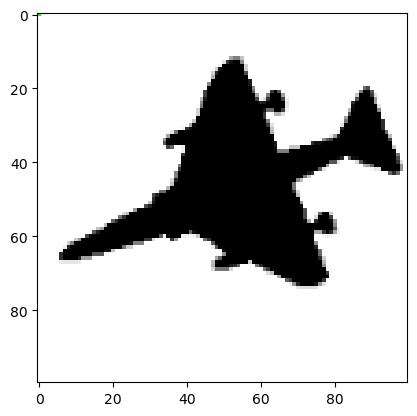

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-100.08057765106359
-100.08057765106359


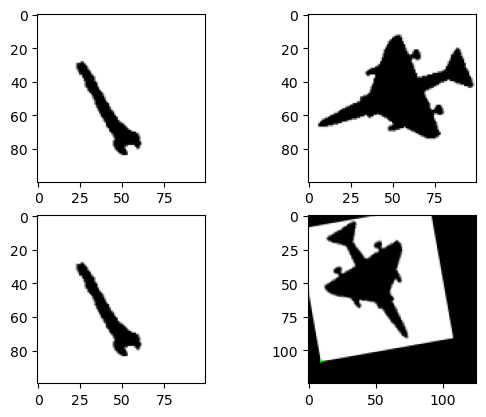

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/skyhawkocc1.png


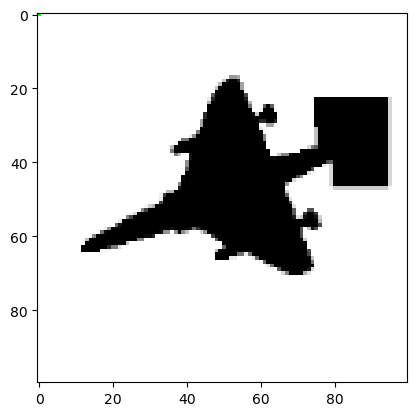

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-100.00446304500983
-100.00446304500983


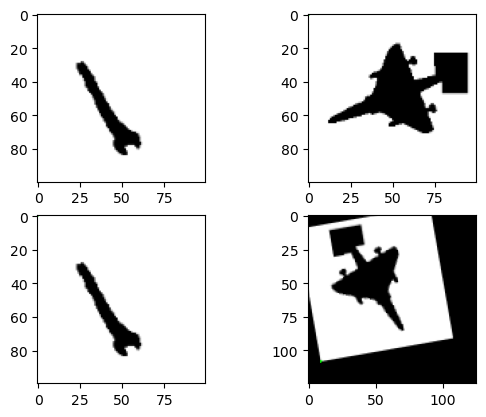

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/swamprabbit.png


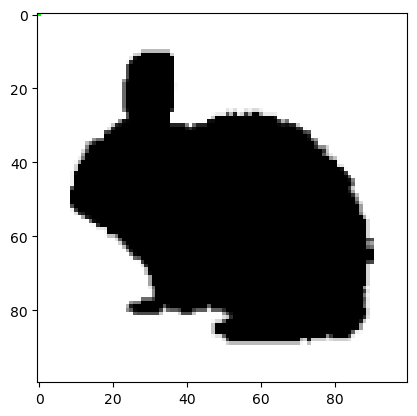

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
12.979120496029319
12.979120496029319


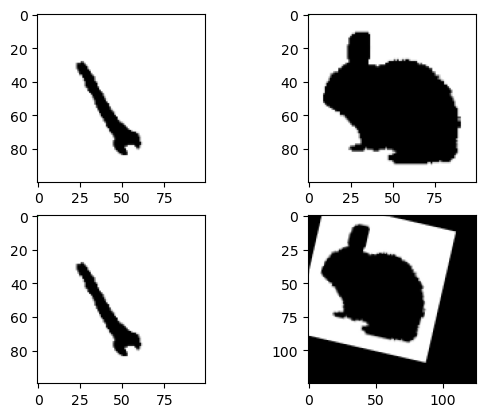

./KIMIA dataset/swamprabbitocc2.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


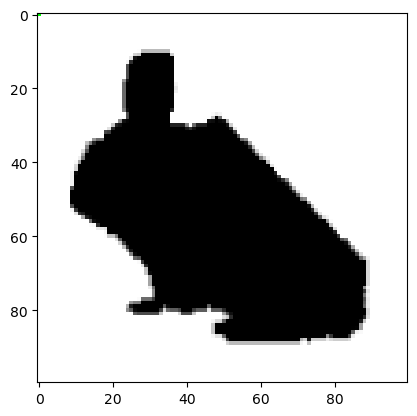

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
9.782493339339807
9.782493339339807


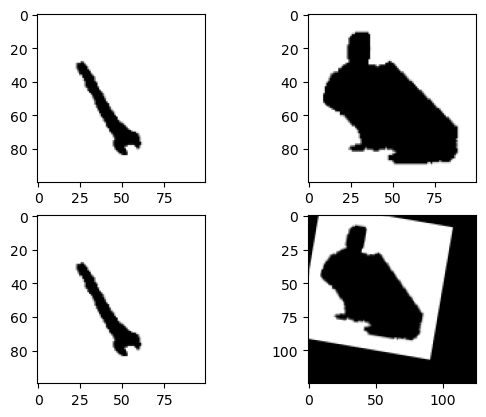

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/swordfishes.png


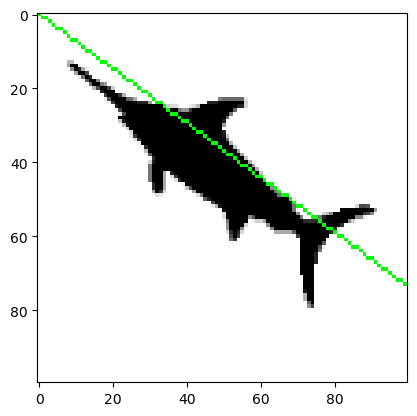

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-157.9558048542996
-157.9558048542996


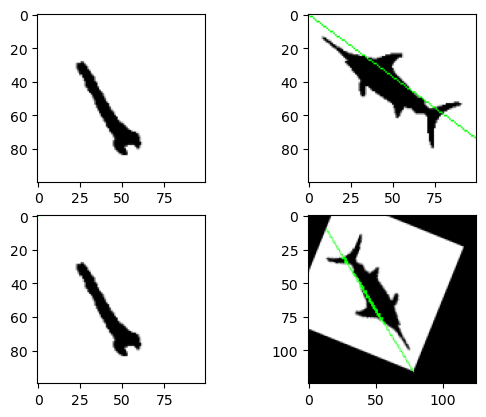

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool04.png


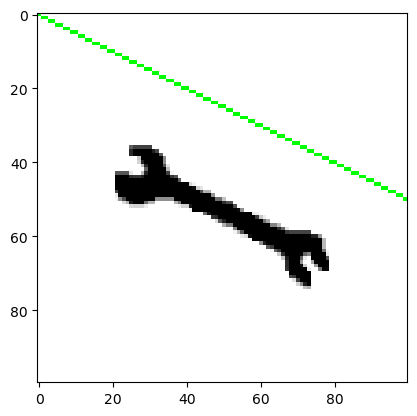

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-148.31193721330908
-148.31193721330908


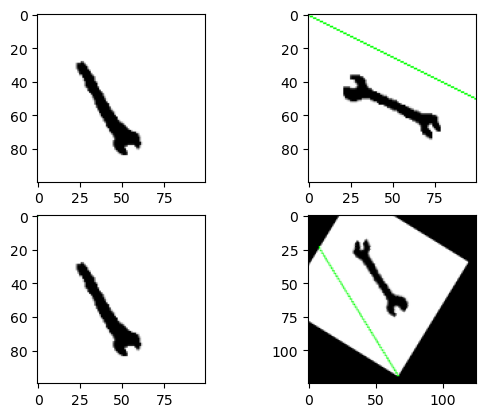

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool04bent1.png


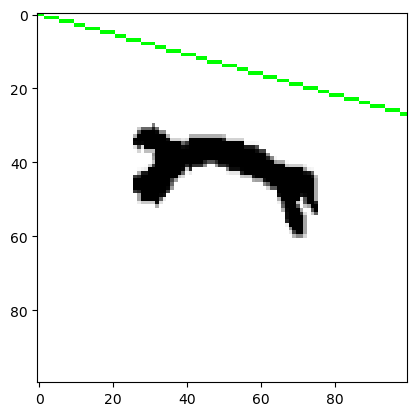

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-136.7701952431739
-136.7701952431739


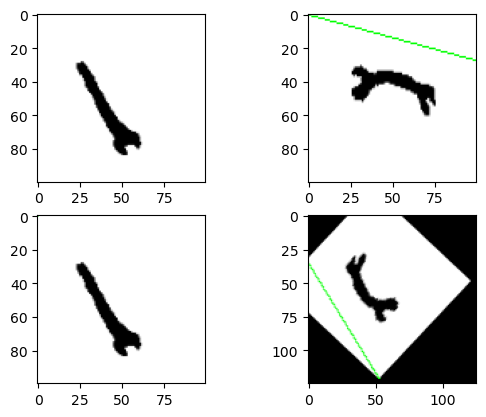

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool07.png


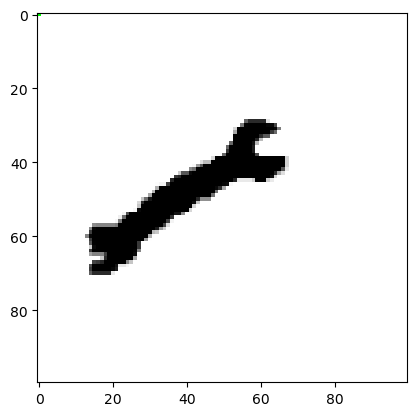

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-88.29138618081434
-88.29138618081434


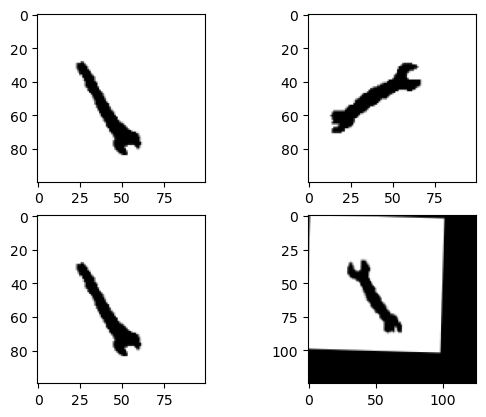

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool08.png


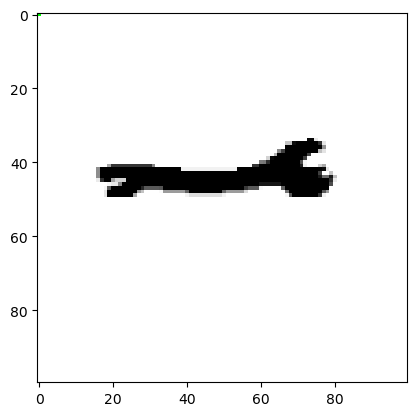

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-117.7895955912169
-117.7895955912169


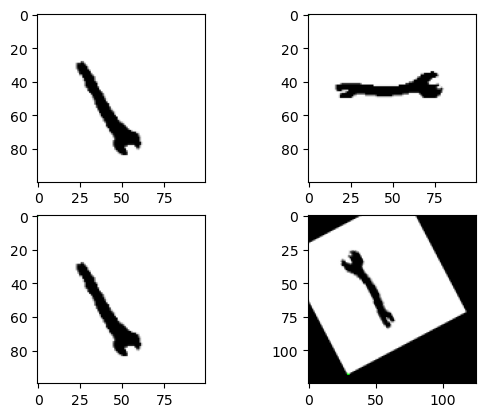

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool09.png


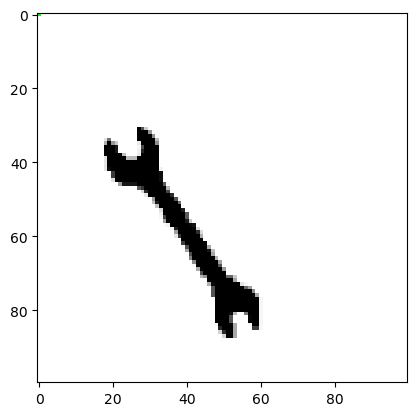

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
3.039949827763915
3.039949827763915


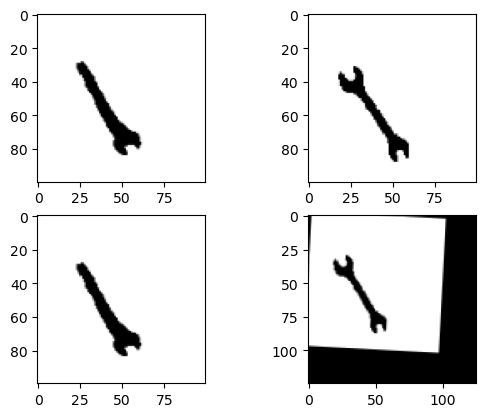

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool12.png


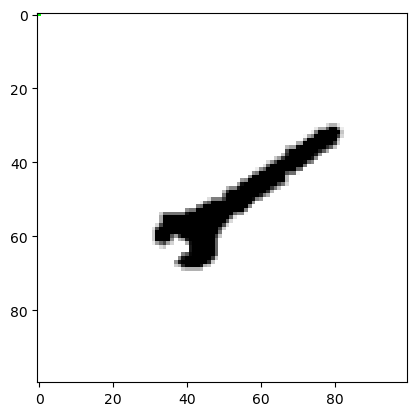

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-85.75216310357632
-85.75216310357632


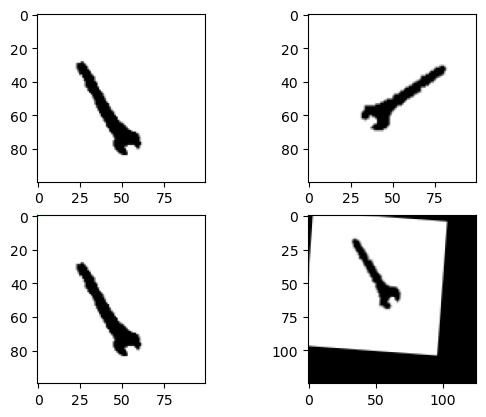

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool17.png


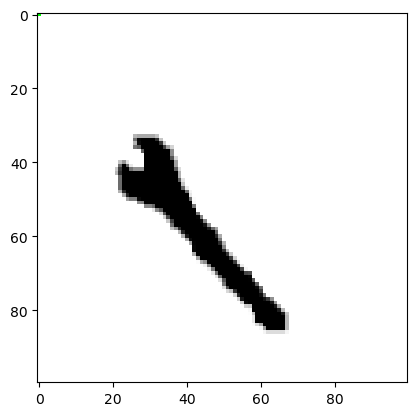

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
7.537716089152725
7.537716089152725


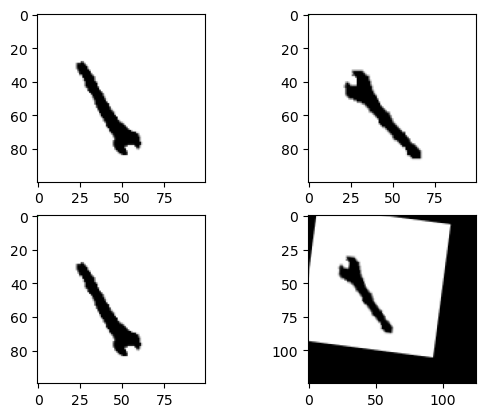

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool27.png


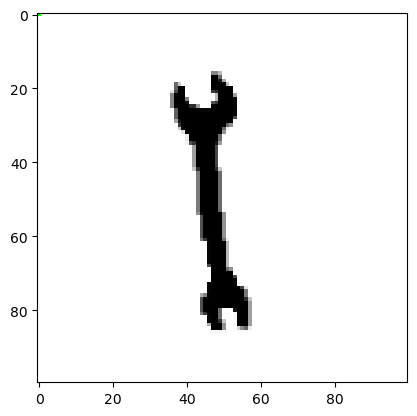

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-25.03121011380396
-25.03121011380396


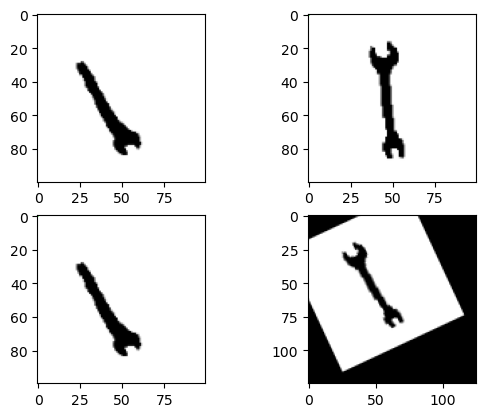

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool38.png


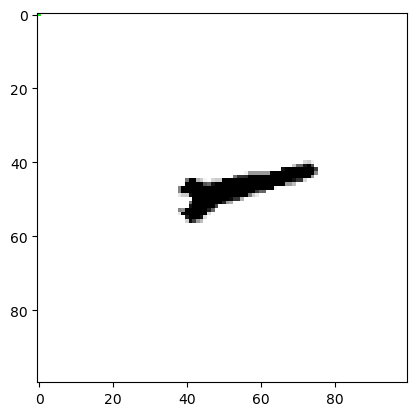

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-106.49617692503801
-106.49617692503801


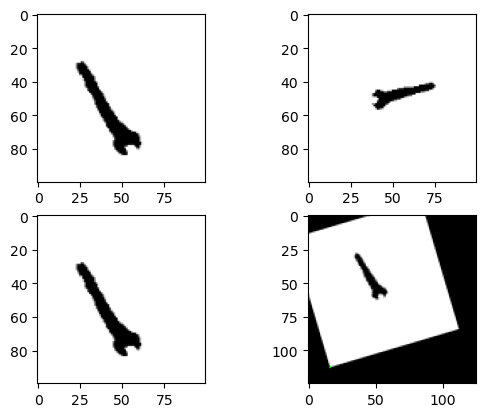

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/tool44.png


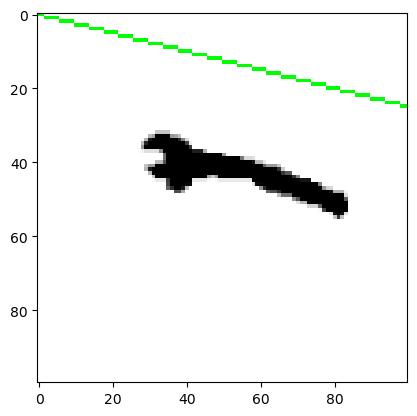

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-135.80883832030676
-135.80883832030676


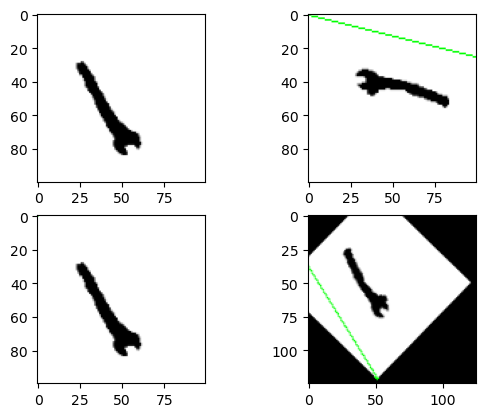

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


./KIMIA dataset/whalesharks.png


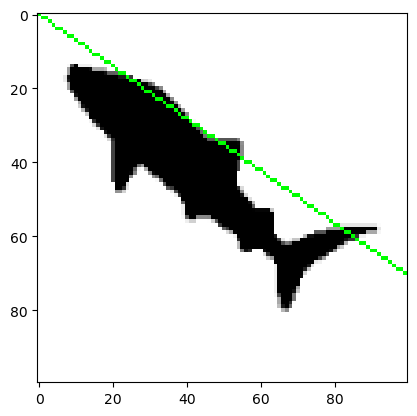

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 0)
-156.73905405688362
-156.73905405688362


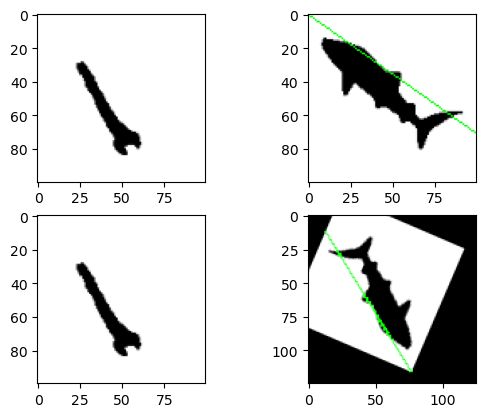

In [7]:
getAllRotation("./KIMIA dataset/tool22.png", "./KIMIA dataset/")